# **Import Data**

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [ ]:
import os


from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data="/content/drive/MyDrive/dataset/Dataset5.csv"


In [ ]:
data = pd.read_csv (data)


In [ ]:
leoni_data = data.copy()

In [ ]:
dataset = data.copy()

In [ ]:
dataset.head(50)

,Leoni Part Number,FORS Part Number,SIGIP Part Number,Usage Recommendation,Originating BU,External part number,Angled,Contact System,Delivery Form,Finish,...,Tab Width [mm],Terminal Shape,Wire Connection Type,Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range From [AWG],Wire Size Range To [mm²],Wire Size Range To [AWG]
0,P00100889,NaN,NaN,NaN,CV,0460-002-16141,false,RK,on a strap,Ni,...,NaN,Round,soldered,NaN,NaN,NaN,0.50,16,1.50,20
1,P00033527,NaN,NaN,NaN,NaN,NaN,NaN,DIA 2.5,on a strap,NaN,...,2.5,NaN,NaN,NaN,NaN,NaN,2.51,NaN,4.00,NaN
2,P00117177,NaN,NaN,NaN,NaN,0-0963728-2,false,MQS 0.64,single,Au,...,0.64,Box,crimped,NaN,1.6,NaN,0.25,23,0.35,22
3,P00088572,NaN,NaN,NaN,BMW,28.320.306.185,NaN,NaN,NaN,NaN,...,NaN,NaN,crimped,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P00072506,NaN,NaN,NaN,GM,3-0964282-1,false,JPT 2.8,on a strap,Au,...,2.8,Spring,crimped,Cu,2.3,NaN,0.20,NaN,0.50,NaN
5,P00172987,NaN,NaN,NaN,NaN,7116-5626-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P00172634,NaN,NaN,NaN,NaN,NA00172634,false,NaN,on a strap,blank,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,P00087589,NaN,NaN,NaN,NaN,0-1452662-1,NaN,MCON 1.2,on a strap,Sn,...,1.2,Box,crimped,NaN,NaN,NaN,0.14,NaN,0.22,NaN
8,P00087597,NaN,NaN,NaN,VW group - VW Audi,6 008 24 11,NaN,DuoTwin 0.64,on a strap,Sn,...,0.64,Box,crimped,NaN,NaN,NaN,0.35,NaN,0.50,NaN
9,P00087598,NaN,NaN,NaN,NaN,6 008 14 14,NaN,DuoTwin 0.64,on a strap,Au,...,0.64,Box,crimped,NaN,NaN,NaN,0.35,NaN,0.50,NaN


# **Missing values statics**

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()]
## 2- step print the feature name and the percentage of missing values

for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4),  ' % missing values')


Leoni Part Number 0.0  % missing values
FORS Part Number 13.3218  % missing values
SIGIP Part Number 50.6228  % missing values
Usage Recommendation 93.1593  % missing values
Originating BU 46.12  % missing values
External part number  2.318  % missing values
Angled 43.1293  % missing values
Contact System 18.3641  % missing values
Delivery Form 40.5981  % missing values
Finish 21.5213  % missing values
Gender 15.4066  % missing values
Grease - Gel 43.882  % missing values
HV Qualified 50.5628  % missing values
Material Name 21.6479  % missing values
Material Thickness [mm] 52.8275  % missing values
Strip Length [mm] 48.0117  % missing values
Multi Crimp 45.8736  % missing values
Number Of Parts 45.0943  % missing values
Primary Lock 40.1519  % missing values
Sealability 24.8451  % missing values
Tab Thickness [mm] 50.0033  % missing values
Tab Width [mm] 51.0558  % missing values
Terminal Shape 40.8046  % missing values
Wire Connection Type 23.5796  % missing values
Wire Material 57.51

# **Drop useless columns**

In [ ]:
dataset.columns

Index(['Leoni Part Number', 'FORS Part Number', 'SIGIP Part Number',
       'Usage Recommendation', 'Originating BU', 'External part number ',
       'Angled', 'Contact System', 'Delivery Form', 'Finish', 'Gender',
       'Grease - Gel', 'HV Qualified', 'Material Name',
       'Material Thickness [mm]', 'Strip Length [mm]', 'Multi Crimp',
       'Number Of Parts', 'Primary Lock', 'Sealability', 'Tab Thickness [mm]',
       'Tab Width [mm]', 'Terminal Shape', 'Wire Connection Type',
       'Wire Material', 'Wire Max. External Diameter [mm]',
       'Wire Min. External Diameter [mm]', 'Wire Size Range From [mm²]',
       'Wire Size Range From [AWG]', 'Wire Size Range To [mm²]',
       'Wire Size Range To [AWG]'],
      dtype='object')

In [ ]:
dataset['Leoni Part Number'].equals(dataset['FORS Part Number'])

False

In [ ]:
l=dataset['Contact System'].unique().tolist()
l

['RK',
 'DIA 2.5',
 'MQS 0.64',
 nan,
 'JPT 2.8',
 'MCON 1.2',
 'DuoTwin 0.64',
 'MAK 2.8',
 'SWP 2.5',
 'DFK 40 4.8',
 'DFK 6.3',
 'JT 2.8',
 'ELO Power 2.8',
 'MCP 2.8',
 'MLK 1.2',
 'DCS-2 2.8',
 'MPQ 2.8',
 'MPT 9.5',
 'BMK 0.6',
 'HSD',
 'DCK 1.5',
 'Ducon 6.3',
 'VF 2.8',
 'Ducon 1.5',
 'MIC-P 1.0',
 'MICRO 0.64',
 'BOX 4.8',
 'LKS 1.5',
 'Spring 0.64',
 'E95',
 'BOX 2.8',
 'DS 2.8',
 'ML 0.40',
 '1.5',
 'SLK 5.8',
 'MLK 1.2 Sm',
 'MLK 1.2 Smg',
 '025 TS',
 'FASTON 6.3',
 'BOX 6.3',
 'RK 1.2',
 'DIA 4 GLOW PLUG',
 'RK 2.5',
 'CTS 2.8',
 '025 HSC',
 '025 MMC',
 '090 NMWP',
 '250 DSD',
 'MULTILOCK 040',
 'RK 4',
 'MQS 0.64 CB',
 'ELO 0.64',
 'HCM 0.64',
 'MSK 0.64',
 'TAB 8.0',
 'SPT 6.3 Type A',
 '060 NIC',
 'MTS-II 0.64',
 'MOX 0.64',
 'GTS 1.5',
 '040-III',
 'MULTILOCK 070',
 'DCS 9.5',
 'MQS 1.5',
 'SPT 6.3',
 'Blade 2.8',
 'MAK 12',
 'TAB 5.8',
 'DIA 2.5 (90 DEG)',
 'BULB SOCKET',
 'US 2.8x0.6',
 'SIKO1 6.3',
 'TAB 6.3',
 'DFK',
 'HD 20',
 'D-3',
 'MDK3',
 '2.8',
 'MAK 8',
 '2

In [ ]:
len(l)

814

In [ ]:
dataset.shape

(15013, 31)

In [ ]:
dataset['Leoni Part Number'].equals(dataset['SIGIP Part Number'])

False

In [ ]:
l=["FORS Part Number","SIGIP Part Number","HV Qualified","Delivery Form","Grease - Gel","Material Thickness [mm]","Multi Crimp","Number Of Parts","Primary Lock","Terminal Shape","Wire Connection Type","Angled"]

In [ ]:

for i in l :
    dataset.drop(i, axis=1, inplace=True)
    leoni_data.drop(i, axis=1, inplace=True)

In [ ]:
dataset.head(10)

,Leoni Part Number,Usage Recommendation,Originating BU,External part number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range From [AWG],Wire Size Range To [mm²],Wire Size Range To [AWG]
0,P00100889,NaN,CV,0460-002-16141,RK,Ni,male,Cu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,16,1.50,20
1,P00033527,NaN,NaN,NaN,DIA 2.5,NaN,female,CuFeP,5.0,unsealable,2.5,2.5,NaN,NaN,NaN,2.51,NaN,4.00,NaN
2,P00117177,NaN,NaN,0-0963728-2,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,NaN,1.6,NaN,0.25,23,0.35,22
3,P00088572,NaN,BMW,28.320.306.185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P00072506,NaN,GM,3-0964282-1,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,NaN,0.20,NaN,0.50,NaN
5,P00172987,NaN,NaN,7116-5626-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,P00172634,NaN,NaN,NA00172634,NaN,blank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,P00087589,NaN,NaN,0-1452662-1,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,NaN,NaN,NaN,0.14,NaN,0.22,NaN
8,P00087597,NaN,VW group - VW Audi,6 008 24 11,DuoTwin 0.64,Sn,female,NaN,NaN,unsealable,0.62,0.64,NaN,NaN,NaN,0.35,NaN,0.50,NaN
9,P00087598,NaN,NaN,6 008 14 14,DuoTwin 0.64,Au,female,NaN,NaN,unsealable,0.62,0.64,NaN,NaN,NaN,0.35,NaN,0.50,NaN


In [ ]:
sum=0
for i, row in dataset.iterrows():
    if (row["Wire Size Range To [AWG]"]is not "NaN") & ((row["Wire Size Range To [mm²]"]is "NaN") ):
        sum=sum+1
print (sum)

0


In [ ]:
dataset.drop('Wire Size Range From [AWG]', axis=1, inplace=True)
leoni_data.drop('Wire Size Range From [AWG]', axis=1, inplace=True)

In [ ]:
dataset.drop('Wire Size Range To [AWG]', axis=1, inplace=True)
leoni_data.drop('Wire Size Range To [AWG]', axis=1, inplace=True)

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()]
## 2- step print the feature name and the percentage of missing values

for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Usage Recommendation 0.9316  % missing values
Originating BU 0.4612  % missing values
External part number  0.0232  % missing values
Contact System 0.1836  % missing values
Finish 0.2152  % missing values
Gender 0.1541  % missing values
Material Name 0.2165  % missing values
Strip Length [mm] 0.4801  % missing values
Sealability 0.2485  % missing values
Tab Thickness [mm] 0.5  % missing values
Tab Width [mm] 0.5106  % missing values
Wire Material 0.5752  % missing values
Wire Max. External Diameter [mm] 0.5705  % missing values
Wire Min. External Diameter [mm] 0.8329  % missing values
Wire Size Range From [mm²] 0.4452  % missing values
Wire Size Range To [mm²] 0.4458  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean(), 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Usage Recommendation 0.9316  % missing values
Originating BU 0.4612  % missing values
External part number  0.0232  % missing values
Contact System 0.1836  % missing values
Finish 0.2152  % missing values
Gender 0.1541  % missing values
Material Name 0.2165  % missing values
Strip Length [mm] 0.4801  % missing values
Sealability 0.2485  % missing values
Tab Thickness [mm] 0.5  % missing values
Tab Width [mm] 0.5106  % missing values
Wire Material 0.5752  % missing values
Wire Max. External Diameter [mm] 0.5705  % missing values
Wire Min. External Diameter [mm] 0.8329  % missing values
Wire Size Range From [mm²] 0.4452  % missing values
Wire Size Range To [mm²] 0.4458  % missing values


In [ ]:
l1= ["External part number ","Originating BU","Usage Recommendation"]

In [ ]:
dataset.columns

Index(['Leoni Part Number', 'Usage Recommendation', 'Originating BU',
       'External part number ', 'Contact System', 'Finish', 'Gender',
       'Material Name', 'Strip Length [mm]', 'Sealability',
       'Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material',
       'Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]',
       'Wire Size Range From [mm²]', 'Wire Size Range To [mm²]'],
      dtype='object')

In [ ]:
for i in l1 :
    dataset.drop(i, axis=1, inplace=True)
    leoni_data.drop(i, axis=1, inplace=True)

In [ ]:
dataset.shape

(15013, 14)

In [ ]:
dataset.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²]
0,P00100889,RK,Ni,male,Cu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,1.50
1,P00033527,DIA 2.5,NaN,female,CuFeP,5.0,unsealable,2.5,2.5,NaN,NaN,NaN,2.51,4.00
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,NaN,1.6,NaN,0.25,0.35
3,P00088572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,NaN,0.20,0.50


In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()]
## 2- step print the feature name and the percentage of missing values

for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean(), 4)*100,  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 18.360000000000003  % missing values
Finish 21.52  % missing values
Gender 15.409999999999998  % missing values
Material Name 21.65  % missing values
Strip Length [mm] 48.010000000000005  % missing values
Sealability 24.85  % missing values
Tab Thickness [mm] 50.0  % missing values
Tab Width [mm] 51.06  % missing values
Wire Material 57.52  % missing values
Wire Max. External Diameter [mm] 57.05  % missing values
Wire Min. External Diameter [mm] 83.28999999999999  % missing values
Wire Size Range From [mm²] 44.519999999999996  % missing values
Wire Size Range To [mm²] 44.58  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean(), 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.1836  % missing values
Finish 0.2152  % missing values
Gender 0.1541  % missing values
Material Name 0.2165  % missing values
Strip Length [mm] 0.4801  % missing values
Sealability 0.2485  % missing values
Tab Thickness [mm] 0.5  % missing values
Tab Width [mm] 0.5106  % missing values
Wire Material 0.5752  % missing values
Wire Max. External Diameter [mm] 0.5705  % missing values
Wire Min. External Diameter [mm] 0.8329  % missing values
Wire Size Range From [mm²] 0.4452  % missing values
Wire Size Range To [mm²] 0.4458  % missing values


In [ ]:
dataset.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²]
0,P00100889,RK,Ni,male,Cu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.50,1.50
1,P00033527,DIA 2.5,NaN,female,CuFeP,5.0,unsealable,2.5,2.5,NaN,NaN,NaN,2.51,4.00
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,NaN,1.6,NaN,0.25,0.35
3,P00088572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,NaN,0.20,0.50


In [ ]:
dataset["id"]=dataset.index
leoni_data["id"]=leoni_data.index

# **Data comprehension**

valeurs erronées

# Tab Thickness [mm]

In [ ]:
lista=[]
for j, row in dataset.iterrows():
    try:
        val = float(row['Tab Thickness [mm]'])
        dataset["Tab Thickness [mm]"][j]= val
        leoni_data["Tab Thickness [mm]"][j]= val
    except ValueError:
        if (row['Tab Thickness [mm]'] != "None"):
            lista.append([row['Tab Thickness [mm]'],j])
            print([row['Tab Thickness [mm]'],j])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Wire Size Range From [mm²]', 11174]
['Cu', 11196]
['Cu', 11197]
['Cu', 11198]
['Cu', 11199]
['Cu', 11200]
['Cu', 11201]
['Cu', 11202]
['Cu', 11203]
['Cu', 11204]
['Cu', 11205]
['Cu', 11206]
['Cu', 11207]
['Cu', 11208]
['Cu', 11209]
['Cu', 11210]
['Cu', 11211]
['Cu', 11212]
['Cu', 11213]
['not defined', 11512]
['crimped', 11514]
['crimped', 11515]
['crimped', 11516]
['crimped', 11517]
['not defined', 11518]
['crimped', 11519]
['crimped', 11520]
['crimped', 11521]
['crimped', 11522]
['crimped', 11523]
['crimped', 11524]
['pressed', 11525]
['crimped', 11526]
['crimped', 11527]
['crimped', 11528]
['crimped', 11529]
['crimped', 11530]
['crimped', 11531]
['crimped', 11532]
['crimped', 11534]
['crimped', 11535]
['crimped', 11536]
['crimped', 11537]
['crimped', 11538]
['crimped', 11539]
['crimped', 11540]
['crimped', 11541]
['crimped', 11542]
['crimped', 11543]
['crimped', 11544]
['crimped', 11545]
['crimped', 11546]
['crimped', 11547]
['crimped', 11548]
['crimped', 11549]
['crimped', 11550]

In [ ]:
for i in lista : 
    dataset.drop(i[1],inplace=True)
    leoni_data.drop(i[1],inplace=True)

# Tab Width [mm]

In [ ]:
lista=[]
for j, row in dataset.iterrows():
    try:
        val = float(row['Tab Width [mm]'])
        dataset["Tab Width [mm]"][j]= val
        leoni_data["Tab Width [mm]"][j]= val
    except ValueError:
        if (row['Tab Width [mm]'] != "None"):
            lista.append([row['Tab Width [mm]'],j])
            print([row['Tab Width [mm]'],j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


['Metric', 11179]
['Metric', 11180]
['Metric', 11193]
['Metric', 11194]
['Cu', 11533]
['Cu', 11687]
['Cu', 11711]
['Cu', 11717]
['Cu', 11732]
['Cu', 11736]
['Cu', 12879]
['Cu', 12880]
['Cu', 12919]
['Cu', 13212]
['Cu', 13272]
['Cu', 14269]
['Cu', 14456]
['Cu', 14458]
['Cu', 14612]
['Cu', 14995]


In [ ]:
for i in lista : 
    dataset.drop(i[1],inplace=True)
    leoni_data.drop(i[1],inplace=True)

# Strip Length [mm]

In [ ]:
lista=[]
for j, row in dataset.iterrows():
    try:
        val = float(row['Strip Length [mm]'])
        dataset["Strip Length [mm]"][j]= val
        leoni_data["Strip Length [mm]"][j]= val
    except ValueError:
        if (row['Strip Length [mm]'] != "None"):
            lista.append([row['Strip Length [mm]'],j])
            print(row['Strip Length [mm]'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


unsealable
unsealable
unsealable
unsealable
unsealable
unsealable
unsealable


In [ ]:
d = {
        'I': 1.00,
        'II': 2.00,
        'III': 3.00,
        'IV': 4.00,
        'V': 5.00,
        'VI':6.00,
        'VII': 7.00
}

In [ ]:
for k in d.keys():
    dataset["Strip Length [mm]"]= dataset["Strip Length [mm]"].replace(k,d[k])
    leoni_data["Strip Length [mm]"]= leoni_data["Strip Length [mm]"].replace(k,d[k])

In [ ]:
lista=[]
for j, row in dataset.iterrows():
    try:
        val = float(row['Strip Length [mm]'])
        dataset["Strip Length [mm]"][j]= val
        leoni_data["Strip Length [mm]"][j]= val
    except ValueError:
        if (row['Strip Length [mm]'] != "None"):
            lista.append([row['Strip Length [mm]'],j])
            print(row['Strip Length [mm]'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


unsealable
unsealable
unsealable
unsealable
unsealable
unsealable
unsealable


In [ ]:
for i in lista : 
    dataset.drop(i[1],inplace=True)
    leoni_data.drop(i[1],inplace=True)

# Wire Max. External Diameter [mm]

In [ ]:
lista=[]
for j, row in dataset.iterrows():
    try:
        val = float(row['Wire Max. External Diameter [mm]'])
        dataset["Wire Max. External Diameter [mm]"][j]= val
        leoni_data["Wire Max. External Diameter [mm]"][j]= val
    except ValueError:
        if (row['Wire Max. External Diameter [mm]'] != "None"):
            lista.append(row['Wire Max. External Diameter [mm]'])
            print(row['Wire Max. External Diameter [mm]'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Metric
Metric
Metric
Metric
2/0
4/0
4/0
3/0
Metric
Metric


In [ ]:
s = set(lista)
s

{'2/0', '3/0', '4/0', 'Metric'}

# Wire Min. External Diameter [mm]

In [ ]:
lista=[]
for j, row in dataset.iterrows():
    try:
        val = float(row['Wire Min. External Diameter [mm]'])
        dataset["Wire Min. External Diameter [mm]"][j]= val
        leoni_data["Wire Min. External Diameter [mm]"][j]= val
    except ValueError:
        if (row['Wire Min. External Diameter [mm]'] != "None"):
            lista.append(row['Wire Min. External Diameter [mm]'])
            print(row['Wire Min. External Diameter [mm]'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Wire Size Range From [mm²]

In [ ]:
lista=[]
for j, row in dataset.iterrows():
    try:
        val = float(row['Wire Size Range From [mm²]'])
        dataset["Wire Size Range From [mm²]"][j]= val
        leoni_data["Wire Size Range From [mm²]"][j]= val
    except ValueError:
        if (row['Wire Size Range From [mm²]'] != "None"):
            lista.append(row['Wire Size Range From [mm²]'])
            print(row['Wire Size Range From [mm²]'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Wire Size Range To [mm²]

In [ ]:
lista=[]
for j, row in dataset.iterrows():
    try:
        val = float(row['Wire Size Range To [mm²]'])
        dataset["Wire Size Range To [mm²]"][j]= val
        leoni_data["Wire Size Range To [mm²]"][j]= val
    except ValueError:
        if (row['Wire Size Range To [mm²]'] != "None"):
            lista.append(row['Wire Size Range To [mm²]'])
            print(row['Wire Size Range To [mm²]'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# data description


In [ ]:
dataset.describe()

,Wire Size Range From [mm²],Wire Size Range To [mm²],id
count,8329.000000,8320.000000,12399.000000
mean,2.607967,3.786021,6279.653601
std,25.248859,29.978264,3725.988063
min,0.000000,0.000000,0.000000
25%,0.350000,0.600000,3099.500000
50%,0.500000,1.000000,6199.000000
75%,1.500000,2.500000,9298.500000
max,999.000000,1000.000000,14996.000000


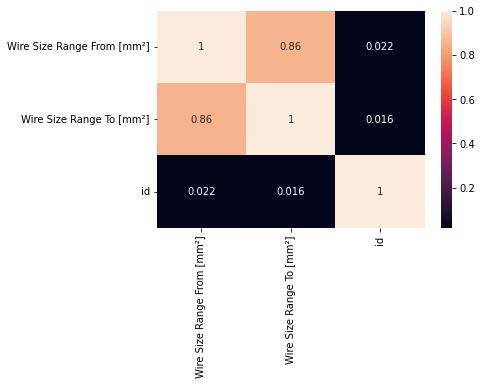

In [ ]:
corr=dataset.corr()
plt.figure()
sns.heatmap(corr,annot=True)
plt.show()

# **Missing values treatment**

# Gender

In [ ]:
 np.round((dataset["Gender"].isnull()).sum(),4)

2258

In [ ]:
l1=dataset[dataset['Gender'].isnull()].index.tolist()
len(l1)

2258

In [ ]:
for i in l1 :
    dataset.drop(i,inplace=True)
    leoni_data.drop(i,inplace=True)

In [ ]:
dataset.shape

(10141, 15)

In [ ]:
l=dataset[dataset['Gender'].isnull()].index.tolist()
len(l)

0

In [ ]:
for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4)+np.round((dataset[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 10.9161  % missing values
Finish 13.4109  % missing values
Gender 0.0  % missing values
Material Name 14.6139  % missing values
Strip Length [mm] 40.2919  % missing values
Sealability 11.7937  % missing values
Tab Thickness [mm] 51.6616  % missing values
Tab Width [mm] 44.8378  % missing values
Wire Material 62.5974  % missing values
Wire Max. External Diameter [mm] 56.2765  % missing values
Wire Min. External Diameter [mm] 75.4363  % missing values
Wire Size Range From [mm²] 20.9644  % missing values
Wire Size Range To [mm²] 21.0532  % missing values
id 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 10.9161  % missing values
Finish 13.4109  % missing values
Gender 0.0  % missing values
Material Name 14.6139  % missing values
Strip Length [mm] 40.2919  % missing values
Sealability 11.7937  % missing values
Tab Thickness [mm] 51.6616  % missing values
Tab Width [mm] 44.8378  % missing values
Wire Material 62.5974  % missing values
Wire Max. External Diameter [mm] 56.2765  % missing values
Wire Min. External Diameter [mm] 75.4363  % missing values
Wire Size Range From [mm²] 20.9644  % missing values
Wire Size Range To [mm²] 21.0532  % missing values
id 0.0  % missing values


# contact system

In [ ]:
 np.round((dataset["Contact System"].isnull()).sum(),4)

1107

In [ ]:
l1=dataset[dataset['Contact System'].isnull()].index.tolist()
len(l1)

1107

In [ ]:
for i in l1 :
    dataset.drop(i,inplace=True)
    leoni_data.drop(i,inplace=True)

In [ ]:
dataset.shape

(9034, 15)

In [ ]:
l=dataset[dataset['Contact System'].isnull()].index.tolist()
len(l)

0

In [ ]:
for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4)+np.round((dataset[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 8.2798  % missing values
Gender 0.0  % missing values
Material Name 9.5085  % missing values
Strip Length [mm] 36.6394  % missing values
Sealability 5.8335  % missing values
Tab Thickness [mm] 46.2586  % missing values
Tab Width [mm] 38.7757  % missing values
Wire Material 58.8444  % missing values
Wire Max. External Diameter [mm] 51.5276  % missing values
Wire Min. External Diameter [mm] 72.6035  % missing values
Wire Size Range From [mm²] 16.0615  % missing values
Wire Size Range To [mm²] 16.1169  % missing values
id 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 8.2798  % missing values
Gender 0.0  % missing values
Material Name 9.5085  % missing values
Strip Length [mm] 36.6394  % missing values
Sealability 5.8335  % missing values
Tab Thickness [mm] 46.2586  % missing values
Tab Width [mm] 38.7757  % missing values
Wire Material 58.8444  % missing values
Wire Max. External Diameter [mm] 51.5276  % missing values
Wire Min. External Diameter [mm] 72.6035  % missing values
Wire Size Range From [mm²] 16.0615  % missing values
Wire Size Range To [mm²] 16.1169  % missing values
id 0.0  % missing values


# Sealability

In [ ]:
 np.round((dataset["Sealability"].isnull()).sum(),4)


527

In [ ]:
l1=dataset[dataset['Sealability'].isnull()].index.tolist()
len(l1)

527

In [ ]:
for i in l1 :
    dataset.drop(i,inplace=True)
    leoni_data.drop(i,inplace=True)

In [ ]:
dataset.shape

(8507, 15)

In [ ]:
l=dataset[dataset['Sealability'].isnull()].index.tolist()
len(l)

0

In [ ]:
for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4)+np.round((dataset[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 6.5005  % missing values
Gender 0.0  % missing values
Material Name 7.7348  % missing values
Strip Length [mm] 33.2785  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 43.1057  % missing values
Tab Width [mm] 35.124  % missing values
Wire Material 57.5408  % missing values
Wire Max. External Diameter [mm] 48.8069  % missing values
Wire Min. External Diameter [mm] 70.9768  % missing values
Wire Size Range From [mm²] 12.766  % missing values
Wire Size Range To [mm²] 12.8482  % missing values
id 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean(), 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 6.5005  % missing values
Gender 0.0  % missing values
Material Name 7.7348  % missing values
Strip Length [mm] 33.2785  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 43.1057  % missing values
Tab Width [mm] 35.124  % missing values
Wire Material 57.5408  % missing values
Wire Max. External Diameter [mm] 48.8069  % missing values
Wire Min. External Diameter [mm] 70.9768  % missing values
Wire Size Range From [mm²] 12.766  % missing values
Wire Size Range To [mm²] 12.8482  % missing values
id 0.0  % missing values


In [ ]:
l= dataset["Sealability"].unique().tolist()
l

['unsealable',
 'sealable',
 'sealable or unsealable',
 'Standard Eyelet',
 'Tubular Eyelet']

In [ ]:
lin = dataset[dataset['Sealability']=="Tubular Eyelet"].index.tolist()
len(lin)

30

In [ ]:
dataset.drop(dataset[dataset['Sealability']=="Tubular Eyelet"].index,inplace=True)
leoni_data.drop(leoni_data[leoni_data['Sealability']=="Tubular Eyelet"].index,inplace=True)

In [ ]:
dataset.drop(dataset[dataset['Sealability']=="Standard Eyelet"].index,inplace=True)
leoni_data.drop(leoni_data[leoni_data['Sealability']=="Standard Eyelet"].index,inplace=True)

In [ ]:
for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4)+np.round((dataset[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 5.5841  % missing values
Gender 0.0  % missing values
Material Name 7.7437  % missing values
Strip Length [mm] 32.4186  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 42.2503  % missing values
Tab Width [mm] 34.1487  % missing values
Wire Material 58.3224  % missing values
Wire Max. External Diameter [mm] 48.3713  % missing values
Wire Min. External Diameter [mm] 70.5405  % missing values
Wire Size Range From [mm²] 11.4545  % missing values
Wire Size Range To [mm²] 11.538  % missing values
id 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 5.5841  % missing values
Gender 0.0  % missing values
Material Name 7.7437  % missing values
Strip Length [mm] 32.4186  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 42.2503  % missing values
Tab Width [mm] 34.1487  % missing values
Wire Material 58.3224  % missing values
Wire Max. External Diameter [mm] 48.3713  % missing values
Wire Min. External Diameter [mm] 70.5405  % missing values
Wire Size Range From [mm²] 11.4545  % missing values
Wire Size Range To [mm²] 11.538  % missing values
id 0.0  % missing values


# Finish

In [ ]:
 np.round((dataset["Finish"].isnull()).sum(),4)


468

In [ ]:
l1=dataset[dataset['Finish'].isnull()].index.tolist()
len(l1)

468

In [ ]:
for i in l1 :
    dataset.drop(i,inplace=True)
    leoni_data.drop(i,inplace=True)

In [ ]:
dataset.shape

(7913, 15)

In [ ]:
dataset['Finish']=dataset.Finish.replace('CUSNP', 'CuSnP')
leoni_data['Finish']=leoni_data.Finish.replace('CUSNP', 'CuSnP')

In [ ]:
dataset.drop(dataset[dataset['Finish']=="blank"].index,inplace=True)
leoni_data.drop(leoni_data[leoni_data['Finish']=="blank"].index,inplace=True)

In [ ]:
dataset['Finish']=dataset.Finish.replace('sn', 'Sn')
leoni_data['Finish']=leoni_data.Finish.replace('sn', 'Sn')

In [ ]:
dataset.Finish.unique()

array(['Au', 'Sn', 'Ag', 'Ni+Sn', 'Ni', 'Ag+Sn', 'Au+Ni', 'Zn', 'Ag+Ni',
       'Au+Ni+Sn', 'CuSn', 'Sn+Pb', 'Pd', 'CuSnP', 'Au+Pd'], dtype=object)

In [ ]:
leoni_data.Finish.unique()

array(['Au', 'Sn', 'Ag', 'Ni+Sn', 'Ni', 'Ag+Sn', 'Au+Ni', 'Zn', 'Ag+Ni',
       'Au+Ni+Sn', 'CuSn', 'Sn+Pb', 'Pd', 'CuSnP', 'Au+Pd'], dtype=object)

In [ ]:
for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4)+np.round((dataset[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 4.1056  % missing values
Strip Length [mm] 27.6304  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 38.4158  % missing values
Tab Width [mm] 29.7162  % missing values
Wire Material 55.0891  % missing values
Wire Max. External Diameter [mm] 44.3696  % missing values
Wire Min. External Diameter [mm] 68.2904  % missing values
Wire Size Range From [mm²] 7.3267  % missing values
Wire Size Range To [mm²] 7.4059  % missing values
id 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature,  np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 4.1056  % missing values
Strip Length [mm] 27.6304  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 38.4158  % missing values
Tab Width [mm] 29.7162  % missing values
Wire Material 55.0891  % missing values
Wire Max. External Diameter [mm] 44.3696  % missing values
Wire Min. External Diameter [mm] 68.2904  % missing values
Wire Size Range From [mm²] 7.3267  % missing values
Wire Size Range To [mm²] 7.4059  % missing values
id 0.0  % missing values


# Material Name

In [ ]:
 np.round((dataset["Material Name"].isnull()).sum(),4)

311

In [ ]:
l1=dataset[dataset['Material Name'].isnull()].index.tolist()
len(l1)

311

In [ ]:
for i in l1 :
    dataset.drop(i,inplace=True)
    leoni_data.drop(i,inplace=True)

In [ ]:
dataset.shape

(7264, 15)

In [ ]:
l= dataset["Material Name"].unique().tolist()
l

['CuNiSi',
 'CuSn',
 'CuCrSiTi',
 'Cu',
 'CuZn',
 'CuSnSi',
 'CuZnPb',
 'CuBe',
 'Cu-Alloy',
 'CuNiPbP',
 'CuFe',
 'CuSnP',
 'CuSnZn',
 'Various (Assembly)',
 'CuNiSiMg',
 'CuFeP',
 'CuFe/CrNi',
 'CuCrAgFeTiSi',
 'CuSnO',
 'CuNiSn',
 'CuZnP',
 'CuMg',
 'CuZnSn',
 'CuSn/CrNi',
 'CuNiZn',
 'CuTeSn/CuBe',
 'Fe-alloy',
 'CuTeSn',
 'not available',
 'CuMgP',
 'CuSnMg',
 'CuNiSi/CrNi',
 'CuFeP/CuBe',
 'CuPb',
 'CuFeZn',
 'Fe',
 'CuNiSiP',
 'CuSn/CuBe',
 'CuFeTiCo',
 'FeNi',
 'PA12',
 'CuTe']

In [ ]:
#dataset.drop(dataset[dataset['Material Name']=="Various (Assembly)"].index,inplace=True)
#leoni_data.drop(leoni_data[leoni_data['Material Name']=="Various (Assembly)"].index,inplace=True)

In [ ]:
dataset.drop(dataset[dataset['Material Name']=="not available"].index,inplace=True)
leoni_data.drop(leoni_data[leoni_data['Material Name']=="not available"].index,inplace=True)

In [ ]:
for feature in dataset.columns: 
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4)+np.round((dataset[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 25.2031  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 36.2071  % missing values
Tab Width [mm] 27.4342  % missing values
Wire Material 53.2158  % missing values
Wire Max. External Diameter [mm] 42.1705  % missing values
Wire Min. External Diameter [mm] 66.9329  % missing values
Wire Size Range From [mm²] 6.5693  % missing values
Wire Size Range To [mm²] 6.6382  % missing values
id 0.0  % missing values


In [ ]:
for feature in leoni_data.columns: 
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 25.2031  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 36.2071  % missing values
Tab Width [mm] 27.4342  % missing values
Wire Material 53.2158  % missing values
Wire Max. External Diameter [mm] 42.1705  % missing values
Wire Min. External Diameter [mm] 66.9329  % missing values
Wire Size Range From [mm²] 6.5693  % missing values
Wire Size Range To [mm²] 6.6382  % missing values
id 0.0  % missing values


# Plot


In [ ]:
import plotly.express as px
fig = px.scatter(dataset, x="Tab Width [mm]", y="Tab Thickness [mm]")
fig.show()

In [ ]:
fig = px.scatter(x=dataset['Wire Size Range To [mm²]'],y=dataset["Wire Size Range From [mm²]"])

fig.show()

In [ ]:
fig = px.histogram(dataset, x='Wire Size Range To [mm²]')

fig.show()

In [ ]:
dataset.columns

Index(['Leoni Part Number', 'Contact System', 'Finish', 'Gender',
       'Material Name', 'Strip Length [mm]', 'Sealability',
       'Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material',
       'Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]',
       'Wire Size Range From [mm²]', 'Wire Size Range To [mm²]', 'id'],
      dtype='object')

# Wire Material

In [ ]:
l= dataset["Wire Material"].unique().tolist()
l

[nan, 'Cu', 'Al', 'Cu and Al']

# Material Name

# Encoding

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'type'.
dataset['Material Name']= label_encoder.fit_transform(dataset['Material Name'])

In [ ]:
dataset['Wire Material'].unique()

array([nan, 'Cu', 'Al', 'Cu and Al'], dtype=object)

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'type'.
dataset['Wire Material']= label_encoder.fit_transform(dataset['Wire Material'])

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'type'.
dataset['Finish']= label_encoder.fit_transform(dataset['Finish'])

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'type'.
dataset['Gender']= label_encoder.fit_transform(dataset['Gender'])

In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'type'.
dataset['Sealability']= label_encoder.fit_transform(dataset['Sealability'])

In [ ]:
dataset.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,3,2,14,NaN,0,0.64,0.64,3,1.6,NaN,0.25,0.35,2
4,P00072506,JPT 2.8,3,0,14,3.5,0,0.8,2.8,1,2.3,NaN,0.20,0.50,4
7,P00087589,MCON 1.2,11,0,21,NaN,0,NaN,1.2,3,NaN,NaN,0.14,0.22,7
11,P00087605,MAK 2.8,11,0,4,NaN,0,0.8,2.8,3,NaN,NaN,0.20,0.35,11
13,P00088453,DFK 40 4.8,11,0,4,NaN,0,0.8,4.8,3,NaN,NaN,1.50,2.50,13


In [ ]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'type'.
dataset['Contact System']= label_encoder.fit_transform(dataset['Sealability'])

In [ ]:
leoni_data.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,NaN,1.6,NaN,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,NaN,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,NaN,NaN,NaN,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,2.8,NaN,NaN,NaN,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,4.8,NaN,NaN,NaN,1.50,2.50,13


In [ ]:
dataset.columns

Index(['Leoni Part Number', 'Contact System', 'Finish', 'Gender',
       'Material Name', 'Strip Length [mm]', 'Sealability',
       'Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material',
       'Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]',
       'Wire Size Range From [mm²]', 'Wire Size Range To [mm²]', 'id'],
      dtype='object')

In [ ]:
leoni_data.columns

Index(['Leoni Part Number', 'Contact System', 'Finish', 'Gender',
       'Material Name', 'Strip Length [mm]', 'Sealability',
       'Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material',
       'Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]',
       'Wire Size Range From [mm²]', 'Wire Size Range To [mm²]', 'id'],
      dtype='object')

In [ ]:
l= dataset["Material Name"].unique().tolist()
l

[14,
 21,
 4,
 0,
 32,
 27,
 34,
 2,
 1,
 13,
 5,
 26,
 28,
 40,
 16,
 7,
 6,
 3,
 25,
 18,
 33,
 11,
 35,
 22,
 19,
 31,
 37,
 30,
 12,
 24,
 15,
 8,
 20,
 10,
 36,
 17,
 23,
 9,
 38,
 39,
 29]

In [ ]:
for feature in dataset.columns: 
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4)+np.round((dataset[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 25.2031  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 36.2071  % missing values
Tab Width [mm] 27.4342  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 42.1705  % missing values
Wire Min. External Diameter [mm] 66.9329  % missing values
Wire Size Range From [mm²] 6.5693  % missing values
Wire Size Range To [mm²] 6.6382  % missing values
id 0.0  % missing values


In [ ]:
for feature in leoni_data.columns: 
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 25.2031  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 36.2071  % missing values
Tab Width [mm] 27.4342  % missing values
Wire Material 53.2158  % missing values
Wire Max. External Diameter [mm] 42.1705  % missing values
Wire Min. External Diameter [mm] 66.9329  % missing values
Wire Size Range From [mm²] 6.5693  % missing values
Wire Size Range To [mm²] 6.6382  % missing values
id 0.0  % missing values


# Decision trees to determine the missing values in wire material

In [ ]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [ ]:
feature_to_tree = ['Contact System','Finish','Gender','Material Name','Sealability','id']
x= dataset[feature_to_tree]
y= dataset[['Wire Material','id']]

In [ ]:
dataset.loc[dataset['Wire Material']==3,'Wire Material']= None

In [ ]:
l= dataset["Wire Material"].unique().tolist()
l

[nan, 1.0, 0.0, 2.0]

In [ ]:
l[0]

nan

In [ ]:
dataset.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,0,3,2,14,NaN,0,0.64,0.64,NaN,1.6,NaN,0.25,0.35,2
4,P00072506,0,3,0,14,3.5,0,0.8,2.8,1.0,2.3,NaN,0.20,0.50,4
7,P00087589,0,11,0,21,NaN,0,NaN,1.2,NaN,NaN,NaN,0.14,0.22,7
11,P00087605,0,11,0,4,NaN,0,0.8,2.8,NaN,NaN,NaN,0.20,0.35,11
13,P00088453,0,11,0,4,NaN,0,0.8,4.8,NaN,NaN,NaN,1.50,2.50,13


In [ ]:
lista=[]
l1=[]
l2=[]
for j, row in dataset.iterrows():
        if (((row['Wire Material']!=l[1])&(row['Wire Material']!=l[2]))&(row['Wire Material']!=l[3])):
            l1.append([j,row["id"]])
            l2.append(j)


In [ ]:
l1


[[2, 2],
 [7, 7],
 [11, 11],
 [13, 13],
 [16, 16],
 [17, 17],
 [18, 18],
 [19, 19],
 [22, 22],
 [23, 23],
 [27, 27],
 [28, 28],
 [29, 29],
 [30, 30],
 [31, 31],
 [32, 32],
 [33, 33],
 [34, 34],
 [37, 37],
 [38, 38],
 [39, 39],
 [43, 43],
 [65, 65],
 [66, 66],
 [67, 67],
 [69, 69],
 [71, 71],
 [72, 72],
 [73, 73],
 [77, 77],
 [134, 134],
 [215, 215],
 [216, 216],
 [217, 217],
 [218, 218],
 [219, 219],
 [220, 220],
 [226, 226],
 [227, 227],
 [229, 229],
 [232, 232],
 [233, 233],
 [234, 234],
 [238, 238],
 [252, 252],
 [262, 262],
 [263, 263],
 [265, 265],
 [268, 268],
 [272, 272],
 [274, 274],
 [279, 279],
 [281, 281],
 [282, 282],
 [283, 283],
 [284, 284],
 [285, 285],
 [286, 286],
 [288, 288],
 [289, 289],
 [290, 290],
 [299, 299],
 [300, 300],
 [304, 304],
 [310, 310],
 [312, 312],
 [325, 325],
 [326, 326],
 [327, 327],
 [328, 328],
 [329, 329],
 [335, 335],
 [337, 337],
 [338, 338],
 [339, 339],
 [341, 341],
 [344, 344],
 [349, 349],
 [351, 351],
 [352, 352],
 [355, 355],
 [356, 356]

In [ ]:
len(l1)

3864

In [ ]:
dataset.shape

(7261, 15)

In [ ]:
data_prev= dataset.loc[l2]

In [ ]:
lid = list(data_prev['id'])

In [ ]:
len(lid)

3864

In [ ]:
lid_glob = list(dataset['id'])

In [ ]:
len(lid_glob)

7261

In [ ]:
lid2=[]
lindex=[]
for i in lid_glob:
    if (i in lid)==False:
        lid2.append(i)
        n = int(dataset[dataset['id']==i].index[0])
        lindex.append(n)

In [ ]:
len(lindex)

3397

In [ ]:
len(lid2)

3397

In [ ]:
x_test = x.loc[l2]
x_train = x.loc[lindex]

In [ ]:
y_test = y.loc[l2]
y_train = y.loc[lindex]

In [ ]:

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [ ]:
y_test['Wire Material'] = y_pred

In [ ]:
y_test

,Wire Material,id
2,1,2
7,1,7
11,1,11
13,1,13
16,1,16
...,...,...
11143,1,11143
11146,1,11146
11148,1,11148
11157,1,11157


In [ ]:
y_test['Wire Material'].unique()

array([1, 0])

In [ ]:
x_result = pd.concat([x_train, x_test])
y_result = pd.concat([y_train, y_test])

In [ ]:
x_result=x_result.sort_values(by=['id'])
y_result=y_result.sort_values(by=['id'])

In [ ]:
data_result = pd.merge(x_result,y_result,on ='id',how = "outer")

In [ ]:
lista=[]
for j, row in data_result.iterrows():
    try:
        val = int(round(row["Wire Material"]))
        data_result['Wire Material'][j]= val
        lista.append("hello")
    except ValueError:
        lista.append("laaaaaaaa")
        

In [ ]:
data_result.head()

,Contact System,Finish,Gender,Material Name,Sealability,id,Wire Material
0,0,3,2,14,0,2,1
1,0,3,0,14,0,4,1
2,0,11,0,21,0,7,1
3,0,11,0,4,0,11,1
4,0,11,0,4,0,13,1


In [ ]:
l= data_result["id"].tolist()
l

[2,
 4,
 7,
 11,
 13,
 16,
 17,
 18,
 19,
 22,
 23,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 37,
 38,
 39,
 43,
 55,
 65,
 66,
 67,
 69,
 71,
 72,
 73,
 77,
 134,
 215,
 216,
 217,
 218,
 219,
 220,
 226,
 227,
 229,
 232,
 233,
 234,
 238,
 252,
 262,
 263,
 265,
 268,
 272,
 274,
 279,
 281,
 282,
 283,
 284,
 285,
 286,
 288,
 289,
 290,
 299,
 300,
 304,
 310,
 312,
 325,
 326,
 327,
 328,
 329,
 335,
 337,
 338,
 339,
 341,
 344,
 349,
 351,
 352,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 367,
 372,
 375,
 376,
 380,
 382,
 388,
 390,
 391,
 394,
 396,
 398,
 404,
 405,
 406,
 407,
 408,
 412,
 413,
 414,
 415,
 417,
 420,
 421,
 422,
 423,
 424,
 425,
 426,
 427,
 428,
 429,
 431,
 436,
 437,
 439,
 440,
 442,
 443,
 444,
 445,
 446,
 448,
 452,
 453,
 454,
 455,
 456,
 458,
 459,
 460,
 461,
 468,
 469,
 470,
 471,
 474,
 475,
 476,
 477,
 478,
 490,
 493,
 494,
 495,
 496,
 497,
 498,
 502,
 503,
 504,
 513,
 514,
 516,
 525,
 527,
 528,
 530,
 531,
 53

In [ ]:
for i in l :
    dataset["Wire Material"][dataset[dataset["id"]==i].index]=data_result["Wire Material"][data_result[data_result["id"]==i].index]
dataset.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,0,3,2,14,NaN,0,0.64,0.64,1.0,1.6,NaN,0.25,0.35,2
4,P00072506,0,3,0,14,3.5,0,0.8,2.8,1.0,2.3,NaN,0.20,0.50,4
7,P00087589,0,11,0,21,NaN,0,NaN,1.2,1.0,NaN,NaN,0.14,0.22,7
11,P00087605,0,11,0,4,NaN,0,0.8,2.8,1.0,NaN,NaN,0.20,0.35,11
13,P00088453,0,11,0,4,NaN,0,0.8,4.8,1.0,NaN,NaN,1.50,2.50,13


In [ ]:
for i in l :
    leoni_data["Wire Material"][leoni_data[leoni_data["id"]==i].index]=data_result["Wire Material"][data_result[data_result["id"]==i].index]
leoni_data.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,1,1.6,NaN,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,1,2.3,NaN,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,1,NaN,NaN,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,2.8,1,NaN,NaN,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,4.8,1,NaN,NaN,1.50,2.50,13


In [ ]:
leoni_data.loc[leoni_data['Wire Material']==0.,'Wire Material']= "Al"

In [ ]:
leoni_data.loc[leoni_data['Wire Material']==1.,'Wire Material']= "Cu"

In [ ]:
leoni_data.loc[leoni_data['Wire Material']==2.,'Wire Material']= "Cu and Al"

In [ ]:
for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4)+np.round((dataset[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 25.2031  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 36.2071  % missing values
Tab Width [mm] 27.4342  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 42.1705  % missing values
Wire Min. External Diameter [mm] 66.9329  % missing values
Wire Size Range From [mm²] 6.5693  % missing values
Wire Size Range To [mm²] 6.6382  % missing values
id 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')


Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 25.2031  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 36.2071  % missing values
Tab Width [mm] 27.4342  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 42.1705  % missing values
Wire Min. External Diameter [mm] 66.9329  % missing values
Wire Size Range From [mm²] 6.5693  % missing values
Wire Size Range To [mm²] 6.6382  % missing values
id 0.0  % missing values


In [ ]:
leoni_data.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,Cu,1.6,NaN,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,NaN,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,Cu,NaN,NaN,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,2.8,Cu,NaN,NaN,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,4.8,Cu,NaN,NaN,1.50,2.50,13


In [ ]:
leoni_data.shape

(7261, 15)

# Filling missing values using clustering techniques 

In [ ]:
df=dataset.loc[:,['Finish', 'Gender','Material Name', 'Strip Length [mm]', 'Sealability','Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material','Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]','Wire Size Range From [mm²]', 'Wire Size Range To [mm²]']]

In [ ]:
df.head()

,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²]
2,3,2,14,NaN,0,0.64,0.64,1.0,1.6,NaN,0.25,0.35
4,3,0,14,3.5,0,0.8,2.8,1.0,2.3,NaN,0.20,0.50
7,11,0,21,NaN,0,NaN,1.2,1.0,NaN,NaN,0.14,0.22
11,11,0,4,NaN,0,0.8,2.8,1.0,NaN,NaN,0.20,0.35
13,11,0,4,NaN,0,0.8,4.8,1.0,NaN,NaN,1.50,2.50


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = dataset.filter(['Finish', 'Gender','Material Name', 'Strip Length [mm]', 'Sealability','Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material','Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]','Wire Size Range From [mm²]', 'Wire Size Range To [mm²]'], axis=1).copy()


# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

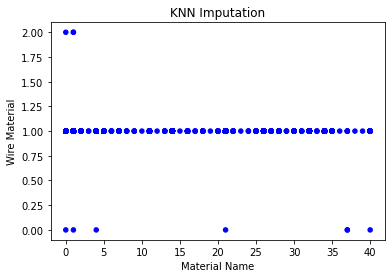

In [ ]:
fig = plt.Figure()
null_values = dataset['Wire Material'].isnull() 
fig = df_knn_imputed.plot(x='Material Name', y='Wire Material', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)


In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = dataset.filter(['Finish', 'Gender','Material Name', 'Strip Length [mm]', 'Sealability','Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material','Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]','Wire Size Range From [mm²]', 'Wire Size Range To [mm²]'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



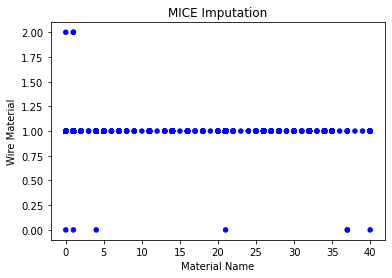

In [ ]:
fig = plt.Figure()
null_values = df['Wire Material'].isnull() 
fig = df_mice_imputed.plot(x='Material Name', y='Wire Material', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)


In [ ]:
dataset.describe()

,Contact System,Finish,Gender,Material Name,Sealability,Wire Material,Wire Size Range From [mm²],Wire Size Range To [mm²],id
count,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,7261.000000,6784.000000,6779.000000,7261.000000
mean,1.441537,7.903732,0.559152,16.083735,1.441537,0.999449,2.538856,3.573547,5864.974521
std,0.894768,4.506373,0.896876,12.195769,0.894768,0.037109,22.045674,25.543140,3467.066504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.000000,3.000000,0.000000,2.000000,0.000000,1.000000,0.350000,0.500000,2567.000000
50%,2.000000,11.000000,0.000000,14.000000,2.000000,1.000000,0.500000,1.000000,5869.000000
75%,2.000000,11.000000,2.000000,32.000000,2.000000,1.000000,1.500000,2.500000,9164.000000
max,2.000000,13.000000,2.000000,40.000000,2.000000,2.000000,999.000000,999.000000,11173.000000


# Outliers

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

vars = [ 'Strip Length [mm]', 
       'Tab Thickness [mm]', 'Tab Width [mm]', 
       'Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]',
       'Wire Size Range From [mm²]', 'Wire Size Range To [mm²]']
fig = make_subplots(rows=1, cols=len(vars))
for i, var in enumerate(vars):
    fig.add_trace(
        go.Box(y=dataset[var],
        name=var),
        row=1, col=i+1
    )

fig.update_traces(boxpoints='all', jitter=.3)

# **Strip Length [mm]**

In [ ]:
fig = px.scatter(x=dataset['id'],y=dataset["Strip Length [mm]"])

fig.show()

In [ ]:
dataset.shape

(7261, 15)

In [ ]:
l1=dataset[dataset["Strip Length [mm]"]== 999].index
len(l1)

69

In [ ]:
l2 =leoni_data[leoni_data["Strip Length [mm]"]== 999.0].index
l2

Int64Index([ 1080,  1081,  1096,  1104,  1154,  1155,  1161,  1167,  1168,
             1169,  1170,  1171,  1172,  1234,  1283,  1382,  1390,  1395,
             1451,  1856,  2168,  2511,  2665,  2752,  3070,  3132,  3442,
             3471,  3487,  3488,  3490,  3495,  3560,  3562,  3563,  3564,
             3565,  3566,  3570,  4350,  4429,  5048,  5916,  6481,  7262,
             9858,  9918, 10045, 10052, 10058, 10059, 10084, 10088, 10123,
            10124, 10142, 10154, 10166, 10179, 10190, 10210, 10251, 10889,
            10925, 11163, 11164, 11170, 11171, 11173],
           dtype='int64')

In [ ]:
for i in l1 : 
    dataset.drop(i,inplace=True)
    leoni_data.drop(i,inplace=True)

In [ ]:
leoni_data.shape

(7192, 15)

In [ ]:
fig = px.scatter(x=dataset['id'],y=dataset["Strip Length [mm]"])

fig.show()

In [ ]:
fig = px.scatter(x=leoni_data['id'],y=leoni_data["Strip Length [mm]"])

fig.show()

In [ ]:
fig = px.box(dataset, y='Strip Length [mm]')

fig.show()

In [ ]:
fig = px.box(leoni_data, y='Strip Length [mm]')

fig.show()

In [ ]:
dataset_without_nan = dataset[dataset['Strip Length [mm]'].isnull()==False]

In [ ]:
l= dataset['Strip Length [mm]'].unique()

In [ ]:
s=set(l)
s

{nan,
 0.0,
 0.35,
 0.5,
 0.76,
 0.79,
 0.9,
 1.0,
 1.015,
 1.05,
 1.2,
 1.3,
 1.4,
 1.5,
 1.55,
 1.6,
 1.65,
 1.8,
 2.0,
 2.1,
 2.14,
 2.21,
 2.25,
 2.29,
 2.3,
 2.4,
 2.45,
 2.5,
 2.54,
 2.58,
 2.6,
 2.65,
 2.67,
 2.7,
 2.73,
 2.8,
 2.82,
 2.85,
 2.86,
 2.9,
 2.921,
 2.95,
 3.0,
 3.02,
 3.03,
 3.05,
 3.1,
 3.11,
 3.15,
 3.18,
 3.2,
 3.215,
 3.24,
 3.25,
 3.3,
 3.35,
 3.36,
 3.4,
 3.43,
 3.45,
 3.5,
 3.54,
 3.55,
 3.575,
 3.58,
 3.59,
 3.6,
 3.65,
 3.7,
 3.74,
 3.75,
 3.8,
 3.81,
 3.85,
 3.9,
 3.91,
 3.92,
 3.94,
 3.95,
 3.96,
 3.97,
 4.0,
 4.02,
 4.05,
 4.1,
 4.11,
 4.15,
 4.18,
 4.2,
 4.22,
 4.25,
 4.3,
 4.318,
 4.34,
 4.35,
 4.37,
 4.39,
 4.4,
 4.44,
 4.445,
 4.45,
 4.5,
 4.55,
 4.56,
 4.57,
 4.572,
 4.6,
 4.63,
 4.65,
 4.699,
 4.7,
 4.75,
 4.77,
 4.78,
 4.79,
 4.8,
 4.85,
 4.9,
 4.95,
 5.0,
 5.03,
 5.05,
 5.06,
 5.08,
 5.1,
 5.15,
 5.19,
 5.2,
 5.21,
 5.25,
 5.26,
 5.3,
 5.33,
 5.35,
 5.4,
 5.41,
 5.45,
 5.46,
 5.5,
 5.54,
 5.56,
 5.59,
 5.6,
 5.64,
 5.7,
 5.72,
 5.75,
 5.76,
 5.8

In [ ]:
l1= leoni_data['Strip Length [mm]'].unique()
l1

array([nan, 3.5, 4.5, 3.0, 4.0, 6.0, 3.35, 17.0, 0.9, 5.0, 4.2, 8.0, 4.7,
       4.75, 5.1, 4.25, 4.6, 3.4, 4.3, 3.6, 0.0, 4.4, 5.5, 4.1, 5.15,
       5.25, 11.0, 3.3, 2.5, 3.05, 2.9, 7.0, 3.96, 6.35, 3.1, 4.65, 5.2,
       6.5, 3.8, 32.0, 9.2, 8.7, 4.45, 8.5, 2.45, 9.5, 6.3, 7.5, 6.223,
       11.5, 4.77, 3.7, 2.6, 13.0, 5.6, 7.1, 1.0, 12.5, 31.5, 42.8, 4.11,
       10.0, 3.2, 6.1, 3.94, 5.3, 4.8, 5.75, 3.95, 5.56, 3.25, 5.8, 5.7,
       4.572, 4.05, 7.54, 3.58, 6.4, 3.9, 2.14, 5.93, 6.6, 3.45, 2.0,
       5.08, 4.9, 7.2, 2.25, 6.2, 12.98, 12.85, 4.318, 5.46, 6.43, 7.9,
       7.75, 2.54, 4.37, 2.67, 5.72, 6.9, 2.85, 3.81, 2.95, 5.03, 4.78,
       2.7, 3.75, 9.0, 4.95, 3.65, 14.0, 2.21, 1.4, 2.29, 5.9, 5.4, 7.25,
       5.33, 9.3, 5.35, 1.5, 15.0, 3.18, 0.35, 10.92, 13.5, 3.59, 12.0,
       4.02, 1.3, 10.1, 2.1, 9.8, 32.8, 2.3, 6.8, 5.05, 10.5, 15.5, 16.0,
       18.0, 2.65, 9.4, 2.8, 6.195, 12.2, 26.0, 8.05, 14.11, 18.6, 23.5,
       17.6, 8.33, 19.5, 21.0, 1.8, 23.0, 19.0, 16.5, 25.

In [ ]:
s1=set(l1)
s1

{nan,
 0.0,
 0.35,
 0.5,
 0.76,
 0.79,
 0.9,
 1.0,
 1.015,
 1.05,
 1.2,
 1.3,
 1.4,
 1.5,
 1.55,
 1.6,
 1.65,
 1.8,
 2.0,
 2.1,
 2.14,
 2.21,
 2.25,
 2.29,
 2.3,
 2.4,
 2.45,
 2.5,
 2.54,
 2.58,
 2.6,
 2.65,
 2.67,
 2.7,
 2.73,
 2.8,
 2.82,
 2.85,
 2.86,
 2.9,
 2.921,
 2.95,
 3.0,
 3.02,
 3.03,
 3.05,
 3.1,
 3.11,
 3.15,
 3.18,
 3.2,
 3.215,
 3.24,
 3.25,
 3.3,
 3.35,
 3.36,
 3.4,
 3.43,
 3.45,
 3.5,
 3.54,
 3.55,
 3.575,
 3.58,
 3.59,
 3.6,
 3.65,
 3.7,
 3.74,
 3.75,
 3.8,
 3.81,
 3.85,
 3.9,
 3.91,
 3.92,
 3.94,
 3.95,
 3.96,
 3.97,
 4.0,
 4.02,
 4.05,
 4.1,
 4.11,
 4.15,
 4.18,
 4.2,
 4.22,
 4.25,
 4.3,
 4.318,
 4.34,
 4.35,
 4.37,
 4.39,
 4.4,
 4.44,
 4.445,
 4.45,
 4.5,
 4.55,
 4.56,
 4.57,
 4.572,
 4.6,
 4.63,
 4.65,
 4.699,
 4.7,
 4.75,
 4.77,
 4.78,
 4.79,
 4.8,
 4.85,
 4.9,
 4.95,
 5.0,
 5.03,
 5.05,
 5.06,
 5.08,
 5.1,
 5.15,
 5.19,
 5.2,
 5.21,
 5.25,
 5.26,
 5.3,
 5.33,
 5.35,
 5.4,
 5.41,
 5.45,
 5.46,
 5.5,
 5.54,
 5.56,
 5.59,
 5.6,
 5.64,
 5.7,
 5.72,
 5.75,
 5.76,
 5.8

In [ ]:
outliers = []
q75,q25 = np.percentile(dataset_without_nan.loc[:,"Strip Length [mm]"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
print(min , max)

    

2.4 6.5600000000000005


In [ ]:
dataset.shape

(7192, 15)

In [ ]:
leoni_data.shape

(7192, 15)

In [ ]:
for j, row in dataset.iterrows():
    if (pd.isnull(row['Strip Length [mm]'])==False):
        if(row['Strip Length [mm]']<min):
            print("hello")
            outliers.append(j)
        if(row['Strip Length [mm]']>max):
            print("hello1")
            outliers.append(j)


hello1
hello1
hello
hello1
hello
hello
hello1
hello1
hello
hello
hello1
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello
hello1
hello
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello
hello1
hello1
hello1
hello1
hello
hello1
hello
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello
hello1
hello1
hello1
hello
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello1
hello
hello
hello
hello1
hello1
hello1
hello1
hello
hello1
hello
hello
hello
hello1
hello
hello1
hello1
hello
hello1
hello1
hello1
hello

In [ ]:
len(outliers)

663

In [ ]:
l1=dataset[dataset["Strip Length [mm]"]>40].index
len(l1)

12

In [ ]:
for i in outliers : 
    dataset.drop(i,inplace=True)
    leoni_data.drop(i,inplace=True)

In [ ]:
fig = px.scatter(x=leoni_data['id'],y=leoni_data["Strip Length [mm]"])

fig.show()

# **Tab Thickness [mm]**

In [ ]:
fig = px.scatter(x=dataset['id'],y=dataset["Tab Thickness [mm]"])

fig.show()

In [ ]:
fig = px.box(dataset, y='Tab Thickness [mm]')

fig.show()

In [ ]:
dataset_without_nan = dataset[dataset['Tab Thickness [mm]'].isnull()==False]

In [ ]:
outliers = []
q75,q25 = np.percentile(dataset_without_nan.loc[:,"Tab Thickness [mm]"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
print(min , max)
for j, row in dataset.iterrows():
    if (pd.isnull(row['Tab Thickness [mm]'])==False):
        if(row['Tab Thickness [mm]']<min):
            print("hello")
            outliers.append(j)
        if(row['Tab Thickness [mm]']>max):
            print("hello1")
            outliers.append(j)


0.39999999999999997 1.04
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello
hello
hello
hello
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello
hello
hello1
hello
hello1
hello1
hello
hello
hello
hello1
h

In [ ]:
len(outliers)

739

In [ ]:
for i in outliers : 
    dataset.drop(i,inplace=True) 
    leoni_data.drop(i,inplace=True)

In [ ]:
dataset.shape

(5790, 15)

# **Tab Width [mm]**

In [ ]:
dataset_without_nan = dataset[dataset['Tab Width [mm]'].isnull()==False]

In [ ]:
fig = px.scatter(x=dataset['id'],y=dataset["Tab Width [mm]"])

fig.show()

In [ ]:
fig = px.box(dataset, y='Tab Width [mm]')

fig.show()

In [ ]:
outliers = []
q75,q25 = np.percentile(dataset_without_nan.loc[:,"Tab Width [mm]"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
print(min , max)
for j, row in dataset.iterrows():
    if (pd.isnull(row['Tab Width [mm]'])==False):
        if(row['Tab Width [mm]']<min):
            print("hello")
            outliers.append(j)
        if(row['Tab Width [mm]']>max):
            print("hello1")
            outliers.append(j)


-1.5000000000000002 5.7
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hello1
hel

In [ ]:
len (outliers)

683

In [ ]:
for i in outliers : 
    dataset.drop(i,inplace=True) 
    leoni_data.drop(i,inplace=True)

In [ ]:
dataset.shape

(5107, 15)

In [ ]:
leoni_data.shape

(5107, 15)

# **Wire Size Range To [mm²]**

In [ ]:
dataset_without_nan = dataset[dataset['Wire Size Range To [mm²]'].isnull()==False]

In [ ]:
fig = px.scatter(x=dataset['id'],y=dataset["Wire Size Range To [mm²]"])

fig.show()


In [ ]:
outliers = []
q75,q25 = np.percentile(dataset_without_nan.loc[:,"Wire Size Range To [mm²]"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
print(min , max)
for j, row in dataset.iterrows():
    if (pd.isnull(row['Wire Size Range To [mm²]'])==False):
        if(row['Wire Size Range To [mm²]']<min):
            outliers.append(j)
        if(row['Wire Size Range To [mm²]']>max):
            outliers.append(j)

-1.75 4.25


In [ ]:
len(outliers)

192

In [ ]:
for i in outliers : 
    dataset.drop(i,inplace=True) 
    leoni_data.drop(i,inplace=True)


In [ ]:
fig = px.box(dataset, y='Wire Size Range To [mm²]')

fig.show()

# **Wire Size Range From [mm²]**

In [ ]:
dataset_without_nan = dataset[dataset['Wire Size Range From [mm²]'].isnull()==False]

In [ ]:
fig = px.scatter(x=dataset['id'],y=dataset["Wire Size Range From [mm²]"])

fig.show()


In [ ]:
outliers = []
q75,q25 = np.percentile(dataset_without_nan.loc[:,"Wire Size Range From [mm²]"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
print(min , max)
for j, row in dataset.iterrows():
    if (pd.isnull(row['Wire Size Range From [mm²]'])==False):
        if(row['Wire Size Range From [mm²]']<min):
            outliers.append(j)
        if(row['Wire Size Range From [mm²]']>max):
            outliers.append(j)

-0.47500000000000003 1.645


In [ ]:
len (outliers)

293

In [ ]:
for i in outliers : 
    dataset.drop(i,inplace=True) 
    leoni_data.drop(i,inplace=True)

In [ ]:
fig = px.box(dataset, y='Wire Size Range From [mm²]')

fig.show()

# **Wire Min. External Diameter [mm]**

In [ ]:
for j, row in dataset.iterrows():
    if (row['Wire Min. External Diameter [mm]'] != "None"):
            dataset["Wire Min. External Diameter [mm]"][j]=float(row["Wire Min. External Diameter [mm]"])
            leoni_data["Wire Min. External Diameter [mm]"][j]=float(row["Wire Min. External Diameter [mm]"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset_without_nan = dataset[dataset['Wire Min. External Diameter [mm]'].isnull()==False]

In [ ]:
fig = px.scatter(x=dataset['id'],y=dataset["Wire Min. External Diameter [mm]"])

fig.show()



In [ ]:
dataset["Wire Min. External Diameter [mm]"].unique()

array([nan, 1.2, 1.15, 2.7, 1.9, 1.8, 2.1, 2.0, 1.6, 2.2, 2.45, 1.3, 1.7,
       1.45, 1.4, 0.81, 2.63, 0.95, 0.85, 1.1, 999.0, 1.98, 1.0, 3.5, 2.3,
       3.0, 1.65, 2.01, 2.4, 1.69, 2.03, 1.5, 1.35, 0.2, 1.47, 1.84, 0.0,
       2.48, 1.96, 0.8, 0.9, 1.75, 1.85, 1.25, 1.27, 2.67, 1.64, 0.22,
       1.91, 2.6, 2.16, 1.86, 1.79, 2.8, 2.28, 1.05, 1.02, 3.1, 2.5, 1.63,
       1.52, 0.51, 2.36, 2.15, 1.55, 2.24, 0.4, 0.33, 2.05, 3.81, 0.89,
       2.29, 2.87, 2.42, 3.3, 3.56, 1.07, 2.79, 3.2, 1.42, 1.39, 0.91,
       1.01, 1.67, 1.89, 1.95, 0.7], dtype=object)

In [ ]:
outliers = []
q75,q25 = np.percentile(dataset_without_nan.loc[:,"Wire Min. External Diameter [mm]"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
print(min , max)
for j, row in dataset.iterrows():
    if (pd.isnull(row['Wire Min. External Diameter [mm]'])==False):
        if(row['Wire Min. External Diameter [mm]']<min):
            outliers.append(j)
        if(row['Wire Min. External Diameter [mm]']>max):
            outliers.append(j)


0.15000000000000013 2.9499999999999997


In [ ]:
len(outliers)

102

In [ ]:
for i in outliers : 
    dataset.drop(i,inplace=True) 
    leoni_data.drop(i,inplace=True)





In [ ]:
fig = px.box(dataset, y='Wire Min. External Diameter [mm]')

fig.show()

# **Wire Max. External Diameter [mm]**

In [ ]:
for j, row in dataset.iterrows():
    if (row['Wire Max. External Diameter [mm]'] != "None"):
            dataset["Wire Max. External Diameter [mm]"][j]=float(row["Wire Max. External Diameter [mm]"])
            leoni_data["Wire Max. External Diameter [mm]"][j]=float(row["Wire Max. External Diameter [mm]"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dataset_without_nan = dataset[dataset['Wire Max. External Diameter [mm]'].isnull()==False]

In [ ]:
fig = px.scatter(x=dataset['id'],y=dataset["Wire Max. External Diameter [mm]"])

fig.show()



In [ ]:
outliers = []
q75,q25 = np.percentile(dataset_without_nan.loc[:,"Wire Max. External Diameter [mm]"],[75,25])
intr_qr = q75-q25
max = q75+(1.5*intr_qr)
min = q25-(1.5*intr_qr)
print(min , max)
for j, row in dataset.iterrows():
    if (pd.isnull(row['Wire Max. External Diameter [mm]'])==False):
        if(row['Wire Max. External Diameter [mm]']<min):
            outliers.append(j)
        if(row['Wire Max. External Diameter [mm]']>max):
            outliers.append(j)


0.4999999999999998 3.7


In [ ]:
len(outliers)

44

In [ ]:
for i in outliers : 
    dataset.drop(i,inplace=True) 
    leoni_data.drop(i,inplace=True)





In [ ]:
fig = px.box(dataset, y='Wire Max. External Diameter [mm]')

fig.show()

In [ ]:
dataset.shape

(4476, 15)

In [ ]:
leoni_data.shape

(4476, 15)

In [ ]:
for feature in leoni_data.columns: 
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 47.7659  % missing values
Wire Min. External Diameter [mm] 73.4138  % missing values
Wire Size Range From [mm²] 10.4781  % missing values
Wire Size Range To [mm²] 10.5451  % missing values
id 0.0  % missing values


In [ ]:
for feature in dataset.columns:
    print(feature, np.round(dataset[feature].isnull().mean()*100, 4)+np.round((dataset[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 47.7659  % missing values
Wire Min. External Diameter [mm] 73.4138  % missing values
Wire Size Range From [mm²] 10.4781  % missing values
Wire Size Range To [mm²] 10.5451  % missing values
id 0.0  % missing values


# Filling Missing values using linear Regression technique

# **Wire Size Range From [mm²]**


In [ ]:
dataset.columns

Index(['Leoni Part Number', 'Contact System', 'Finish', 'Gender',
       'Material Name', 'Strip Length [mm]', 'Sealability',
       'Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material',
       'Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]',
       'Wire Size Range From [mm²]', 'Wire Size Range To [mm²]', 'id'],
      dtype='object')

In [ ]:
dataset.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,0,3,2,14,NaN,0,0.64,0.64,1.0,1.6,NaN,0.25,0.35,2
4,P00072506,0,3,0,14,3.5,0,0.8,2.8,1.0,2.3,NaN,0.20,0.50,4
7,P00087589,0,11,0,21,NaN,0,NaN,1.2,1.0,NaN,NaN,0.14,0.22,7
11,P00087605,0,11,0,4,NaN,0,0.8,2.8,1.0,NaN,NaN,0.20,0.35,11
13,P00088453,0,11,0,4,NaN,0,0.8,4.8,1.0,NaN,NaN,1.50,2.50,13


In [ ]:
leoni_data.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,Cu,1.6,NaN,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,NaN,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,Cu,NaN,NaN,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,2.8,Cu,NaN,NaN,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,4.8,Cu,NaN,NaN,1.50,2.50,13


In [ ]:
df=dataset.loc[:,[ 'Finish', 'Gender','Material Name', 'Sealability','Wire Size Range From [mm²]','id']]

In [ ]:
df.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],id
2,3,2,14,0,0.25,2
4,3,0,14,0,0.20,4
7,11,0,21,0,0.14,7
11,11,0,4,0,0.20,11
13,11,0,4,0,1.50,13


In [ ]:
df.columns

Index(['Finish', 'Gender', 'Material Name', 'Sealability',
       'Wire Size Range From [mm²]', 'id'],
      dtype='object')

In [ ]:
df1=dataset.loc[:,['Leoni Part Number', 'Contact System', 'Strip Length [mm]','Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material','Wire Min. External Diameter [mm]','Wire Max. External Diameter [mm]', 'Wire Size Range To [mm²]', 'id']]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()
testdf = df[df['Wire Size Range From [mm²]'].isnull()==True]
traindf = df[df['Wire Size Range From [mm²]'].isnull()==False]
y = traindf['Wire Size Range From [mm²]']
traindf.drop("Wire Size Range From [mm²]",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Wire Size Range From [mm²]",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Wire Size Range From [mm²]']= pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf['Wire Size Range From [mm²]']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
testdf.head()

,Finish,Gender,Material Name,Sealability,id,Wire Size Range From [mm²]
299,11,0,5,0,299,0.640798
349,11,0,21,2,349,0.578933
356,11,0,4,2,356,0.586516
359,11,0,14,2,359,0.582044
493,3,0,26,2,493,0.546819


In [ ]:
traindf.head()

,Finish,Gender,Material Name,Sealability,id,Wire Size Range From [mm²]
2,3,2,14,0,2,0.25
4,3,0,14,0,4,0.20
7,11,0,21,0,7,0.14
11,11,0,4,0,11,0.20
13,11,0,4,0,13,1.50


In [ ]:
df_result = pd.concat([testdf, traindf])


In [ ]:
df_result.head(50)

,Finish,Gender,Material Name,Sealability,id,Wire Size Range From [mm²]
299,11,0,5,0,299,0.640798
349,11,0,21,2,349,0.578933
356,11,0,4,2,356,0.586516
359,11,0,14,2,359,0.582044
493,3,0,26,2,493,0.546819
496,11,0,26,2,496,0.576474
497,3,0,26,2,497,0.546813
498,3,0,26,2,498,0.546811
537,11,0,4,2,537,0.586237
540,11,0,21,2,540,0.578640


In [ ]:
df_result= df_result.sort_values(by=['id'])

In [ ]:
data_horizontal = pd.merge(df_result,df1,on ='id',how = "outer")

In [ ]:
data_horizontal.shape

(4476, 15)

In [ ]:
data_horizontal.head()

,Finish,Gender,Material Name,Sealability,id,Wire Size Range From [mm²],Leoni Part Number,Contact System,Strip Length [mm],Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range To [mm²]
0,3,2,14,0,2,0.25,P00117177,0,NaN,0.64,0.64,1.0,NaN,1.6,0.35
1,3,0,14,0,4,0.20,P00072506,0,3.5,0.8,2.8,1.0,NaN,2.3,0.50
2,11,0,21,0,7,0.14,P00087589,0,NaN,NaN,1.2,1.0,NaN,NaN,0.22
3,11,0,4,0,11,0.20,P00087605,0,NaN,0.8,2.8,1.0,NaN,NaN,0.35
4,11,0,4,0,13,1.50,P00088453,0,NaN,0.8,4.8,1.0,NaN,NaN,2.50


In [ ]:
leoni_data= leoni_data.sort_values(by=['id'])

In [ ]:
l= data_horizontal["id"].tolist()
l

[2,
 4,
 7,
 11,
 13,
 22,
 23,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 37,
 39,
 55,
 65,
 66,
 67,
 69,
 71,
 72,
 73,
 77,
 134,
 215,
 217,
 218,
 219,
 220,
 229,
 252,
 262,
 274,
 279,
 281,
 282,
 283,
 284,
 286,
 289,
 290,
 299,
 300,
 325,
 326,
 327,
 328,
 329,
 335,
 337,
 338,
 339,
 341,
 344,
 349,
 351,
 352,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 367,
 372,
 375,
 376,
 380,
 382,
 388,
 390,
 398,
 404,
 405,
 406,
 407,
 408,
 412,
 414,
 420,
 421,
 422,
 423,
 424,
 436,
 437,
 439,
 440,
 442,
 443,
 444,
 445,
 446,
 448,
 452,
 453,
 454,
 455,
 458,
 459,
 460,
 461,
 468,
 469,
 470,
 471,
 474,
 477,
 478,
 490,
 493,
 494,
 495,
 496,
 497,
 498,
 502,
 503,
 504,
 513,
 514,
 516,
 525,
 530,
 531,
 532,
 536,
 537,
 539,
 540,
 541,
 542,
 545,
 548,
 553,
 554,
 556,
 559,
 560,
 561,
 563,
 565,
 566,
 567,
 571,
 582,
 589,
 592,
 610,
 611,
 612,
 619,
 646,
 656,
 657,
 658,
 674,
 678,
 680,
 682,
 688,
 689,
 690,
 691,
 6

In [ ]:
for i in l :
    leoni_data["Wire Size Range From [mm²]"][leoni_data[leoni_data["id"]==i].index]=data_horizontal["Wire Size Range From [mm²]"][data_horizontal[data_horizontal["id"]==i].index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
leoni_data.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,Cu,1.6,NaN,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,NaN,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,Cu,NaN,NaN,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,2.8,Cu,NaN,NaN,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,4.8,Cu,NaN,NaN,1.50,2.50,13


In [ ]:
for feature in data_horizontal.columns:
    print(feature, np.round(data_horizontal[feature].isnull().mean()*100, 4)+np.round((data_horizontal[feature]==' ').mean()*100, 4),  ' % missing values')

Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Sealability 0.0  % missing values
id 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Min. External Diameter [mm] 73.4138  % missing values
Wire Max. External Diameter [mm] 47.7659  % missing values
Wire Size Range To [mm²] 10.5451  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 47.7659  % missing values
Wire Min. External Diameter [mm] 73.4138  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 10.5451  % missing values
id 0.0  % missing values


# **Wire Size Range To [mm²]**


In [ ]:
df_to=data_horizontal.loc[:,[ 'Finish', 'Gender','Material Name', 'Sealability','Wire Size Range From [mm²]','Wire Size Range To [mm²]','id']]

In [ ]:
df_to.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],Wire Size Range To [mm²],id
0,3,2,14,0,0.25,0.35,2
1,3,0,14,0,0.20,0.50,4
2,11,0,21,0,0.14,0.22,7
3,11,0,4,0,0.20,0.35,11
4,11,0,4,0,1.50,2.50,13


In [ ]:
df_to.columns

Index(['Finish', 'Gender', 'Material Name', 'Sealability',
       'Wire Size Range From [mm²]', 'Wire Size Range To [mm²]', 'id'],
      dtype='object')

In [ ]:
df1_to=data_horizontal.loc[:,['Leoni Part Number', 'Contact System', 'Strip Length [mm]','Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material','Wire Min. External Diameter [mm]','Wire Max. External Diameter [mm]', 'id']]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df_to.head()
testdf = df_to[df_to['Wire Size Range To [mm²]'].isnull()==True]
traindf = df_to[df_to['Wire Size Range To [mm²]'].isnull()==False]
y = traindf['Wire Size Range To [mm²]']
traindf.drop("Wire Size Range To [mm²]",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Wire Size Range To [mm²]",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Wire Size Range To [mm²]']= pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf['Wire Size Range To [mm²]']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
testdf.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],id,Wire Size Range To [mm²]
43,11,0,5,0,0.640798,299,1.021925
56,11,0,21,2,0.578933,349,1.067921
60,11,0,4,2,0.586516,356,0.957579
63,11,0,14,2,0.582044,359,1.022479
117,3,0,26,2,0.546819,493,1.024797


In [ ]:
traindf.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],id,Wire Size Range To [mm²]
0,3,2,14,0,0.25,2,0.35
1,3,0,14,0,0.20,4,0.50
2,11,0,21,0,0.14,7,0.22
3,11,0,4,0,0.20,11,0.35
4,11,0,4,0,1.50,13,2.50


In [ ]:
df_result = pd.concat([testdf, traindf])


In [ ]:
df_result.head(50)

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],id,Wire Size Range To [mm²]
43,11,0,5,0,0.640798,299,1.021925
56,11,0,21,2,0.578933,349,1.067921
60,11,0,4,2,0.586516,356,0.957579
63,11,0,14,2,0.582044,359,1.022479
117,3,0,26,2,0.546819,493,1.024797
120,11,0,26,2,0.576474,496,1.100238
121,3,0,26,2,0.546813,497,1.024793
122,3,0,26,2,0.546811,498,1.024792
134,11,0,4,2,0.586237,537,0.957414
136,11,0,21,2,0.578640,540,1.067746


In [ ]:
df_result= df_result.sort_values(by=['id'])

In [ ]:
data_horizontal_to = pd.merge(df_result,df1_to,on ='id',how = "outer")

In [ ]:
data_horizontal_to.shape

(4476, 15)

In [ ]:
data_horizontal_to.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],id,Wire Size Range To [mm²],Leoni Part Number,Contact System,Strip Length [mm],Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm]
0,3,2,14,0,0.25,2,0.35,P00117177,0,NaN,0.64,0.64,1.0,NaN,1.6
1,3,0,14,0,0.20,4,0.50,P00072506,0,3.5,0.8,2.8,1.0,NaN,2.3
2,11,0,21,0,0.14,7,0.22,P00087589,0,NaN,NaN,1.2,1.0,NaN,NaN
3,11,0,4,0,0.20,11,0.35,P00087605,0,NaN,0.8,2.8,1.0,NaN,NaN
4,11,0,4,0,1.50,13,2.50,P00088453,0,NaN,0.8,4.8,1.0,NaN,NaN


In [ ]:
leoni_data= leoni_data.sort_values(by=['id'])

In [ ]:
l= data_horizontal_to["id"].tolist()
l

[2,
 4,
 7,
 11,
 13,
 22,
 23,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 37,
 39,
 55,
 65,
 66,
 67,
 69,
 71,
 72,
 73,
 77,
 134,
 215,
 217,
 218,
 219,
 220,
 229,
 252,
 262,
 274,
 279,
 281,
 282,
 283,
 284,
 286,
 289,
 290,
 299,
 300,
 325,
 326,
 327,
 328,
 329,
 335,
 337,
 338,
 339,
 341,
 344,
 349,
 351,
 352,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 367,
 372,
 375,
 376,
 380,
 382,
 388,
 390,
 398,
 404,
 405,
 406,
 407,
 408,
 412,
 414,
 420,
 421,
 422,
 423,
 424,
 436,
 437,
 439,
 440,
 442,
 443,
 444,
 445,
 446,
 448,
 452,
 453,
 454,
 455,
 458,
 459,
 460,
 461,
 468,
 469,
 470,
 471,
 474,
 477,
 478,
 490,
 493,
 494,
 495,
 496,
 497,
 498,
 502,
 503,
 504,
 513,
 514,
 516,
 525,
 530,
 531,
 532,
 536,
 537,
 539,
 540,
 541,
 542,
 545,
 548,
 553,
 554,
 556,
 559,
 560,
 561,
 563,
 565,
 566,
 567,
 571,
 582,
 589,
 592,
 610,
 611,
 612,
 619,
 646,
 656,
 657,
 658,
 674,
 678,
 680,
 682,
 688,
 689,
 690,
 691,
 6

In [ ]:
for i in l :
    leoni_data["Wire Size Range To [mm²]"][leoni_data[leoni_data["id"]==i].index]=data_horizontal_to["Wire Size Range To [mm²]"][data_horizontal_to[data_horizontal_to["id"]==i].index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
leoni_data.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,Cu,1.6,NaN,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,NaN,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,Cu,NaN,NaN,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,2.8,Cu,NaN,NaN,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,4.8,Cu,NaN,NaN,1.50,2.50,13


In [ ]:
for feature in data_horizontal_to.columns:
    print(feature, np.round(data_horizontal_to[feature].isnull().mean()*100, 4)+np.round((data_horizontal_to[feature]==' ').mean()*100, 4),  ' % missing values')

Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Sealability 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
id 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Min. External Diameter [mm] 73.4138  % missing values
Wire Max. External Diameter [mm] 47.7659  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 47.7659  % missing values
Wire Min. External Diameter [mm] 73.4138  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values


# **Wire Min. External Diameter [mm]**


In [ ]:
dataset.columns

Index(['Leoni Part Number', 'Contact System', 'Finish', 'Gender',
       'Material Name', 'Strip Length [mm]', 'Sealability',
       'Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material',
       'Wire Max. External Diameter [mm]', 'Wire Min. External Diameter [mm]',
       'Wire Size Range From [mm²]', 'Wire Size Range To [mm²]', 'id'],
      dtype='object')

In [ ]:
dataset.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,0,3,2,14,NaN,0,0.64,0.64,1.0,1.6,NaN,0.25,0.35,2
4,P00072506,0,3,0,14,3.5,0,0.8,2.8,1.0,2.3,NaN,0.20,0.50,4
7,P00087589,0,11,0,21,NaN,0,NaN,1.2,1.0,NaN,NaN,0.14,0.22,7
11,P00087605,0,11,0,4,NaN,0,0.8,2.8,1.0,NaN,NaN,0.20,0.35,11
13,P00088453,0,11,0,4,NaN,0,0.8,4.8,1.0,NaN,NaN,1.50,2.50,13


In [ ]:
leoni_data.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,Cu,1.6,NaN,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,NaN,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,Cu,NaN,NaN,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,2.8,Cu,NaN,NaN,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,4.8,Cu,NaN,NaN,1.50,2.50,13


In [ ]:
df=data_horizontal_to.loc[:,[ 'Finish', 'Gender','Material Name', 'Sealability','Wire Min. External Diameter [mm]','Wire Size Range From [mm²]', 'Wire Size Range To [mm²]','id']]

In [ ]:
df.head()

,Finish,Gender,Material Name,Sealability,Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
0,3,2,14,0,NaN,0.25,0.35,2
1,3,0,14,0,NaN,0.20,0.50,4
2,11,0,21,0,NaN,0.14,0.22,7
3,11,0,4,0,NaN,0.20,0.35,11
4,11,0,4,0,NaN,1.50,2.50,13


In [ ]:
df.columns

Index(['Finish', 'Gender', 'Material Name', 'Sealability',
       'Wire Min. External Diameter [mm]', 'Wire Size Range From [mm²]',
       'Wire Size Range To [mm²]', 'id'],
      dtype='object')

In [ ]:
df1=data_horizontal_to.loc[:,['Leoni Part Number', 'Contact System', 'Strip Length [mm]','Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material','Wire Max. External Diameter [mm]','id']]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()
testdf = df[df['Wire Min. External Diameter [mm]'].isnull()==True]
traindf = df[df['Wire Min. External Diameter [mm]'].isnull()==False]
y = traindf['Wire Min. External Diameter [mm]']
traindf.drop("Wire Min. External Diameter [mm]",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Wire Min. External Diameter [mm]",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Wire Min. External Diameter [mm]']= pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf['Wire Min. External Diameter [mm]']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
testdf.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],Wire Size Range To [mm²],id,Wire Min. External Diameter [mm]
0,3,2,14,0,0.25,0.35,2,1.142954
1,3,0,14,0,0.20,0.50,4,1.183465
2,11,0,21,0,0.14,0.22,7,1.152643
3,11,0,4,0,0.20,0.35,11,1.169176
4,11,0,4,0,1.50,2.50,13,2.305979


In [ ]:
traindf.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],Wire Size Range To [mm²],id,Wire Min. External Diameter [mm]
191,0,0,4,1,0.23,0.35,732,1.2
192,3,0,14,0,0.20,0.50,734,1.15
194,0,0,4,2,1.01,2.50,738,2.7
195,11,0,32,2,1.00,2.00,740,1.9
196,11,0,1,0,1.25,1.50,741,1.8


In [ ]:
df_result = pd.concat([testdf, traindf])


In [ ]:
df_result.head(50)

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],Wire Size Range To [mm²],id,Wire Min. External Diameter [mm]
0,3,2,14,0,0.250000,0.350000,2,1.142954
1,3,0,14,0,0.200000,0.500000,4,1.183465
2,11,0,21,0,0.140000,0.220000,7,1.152643
3,11,0,4,0,0.200000,0.350000,11,1.169176
4,11,0,4,0,1.500000,2.500000,13,2.305979
5,0,0,32,2,0.500000,1.500000,22,1.598245
6,0,0,21,2,1.000000,2.500000,23,2.046341
7,3,0,14,2,0.200000,0.400000,27,1.172706
8,3,0,14,2,0.500000,1.000000,28,1.458176
9,3,0,14,2,1.010000,2.500000,29,2.050394


In [ ]:
df_result= df_result.sort_values(by=['id'])

In [ ]:
data_horizontal = pd.merge(df_result,df1,on ='id',how = "outer")

In [ ]:
data_horizontal.shape

(4476, 15)

In [ ]:
data_horizontal.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],Wire Size Range To [mm²],id,Wire Min. External Diameter [mm],Leoni Part Number,Contact System,Strip Length [mm],Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm]
0,3,2,14,0,0.25,0.35,2,1.142954,P00117177,0,NaN,0.64,0.64,1.0,1.6
1,3,0,14,0,0.20,0.50,4,1.183465,P00072506,0,3.5,0.8,2.8,1.0,2.3
2,11,0,21,0,0.14,0.22,7,1.152643,P00087589,0,NaN,NaN,1.2,1.0,NaN
3,11,0,4,0,0.20,0.35,11,1.169176,P00087605,0,NaN,0.8,2.8,1.0,NaN
4,11,0,4,0,1.50,2.50,13,2.305979,P00088453,0,NaN,0.8,4.8,1.0,NaN


In [ ]:
leoni_data= leoni_data.sort_values(by=['id'])

In [ ]:
l= data_horizontal["id"].tolist()
l

[2,
 4,
 7,
 11,
 13,
 22,
 23,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 37,
 39,
 55,
 65,
 66,
 67,
 69,
 71,
 72,
 73,
 77,
 134,
 215,
 217,
 218,
 219,
 220,
 229,
 252,
 262,
 274,
 279,
 281,
 282,
 283,
 284,
 286,
 289,
 290,
 299,
 300,
 325,
 326,
 327,
 328,
 329,
 335,
 337,
 338,
 339,
 341,
 344,
 349,
 351,
 352,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 367,
 372,
 375,
 376,
 380,
 382,
 388,
 390,
 398,
 404,
 405,
 406,
 407,
 408,
 412,
 414,
 420,
 421,
 422,
 423,
 424,
 436,
 437,
 439,
 440,
 442,
 443,
 444,
 445,
 446,
 448,
 452,
 453,
 454,
 455,
 458,
 459,
 460,
 461,
 468,
 469,
 470,
 471,
 474,
 477,
 478,
 490,
 493,
 494,
 495,
 496,
 497,
 498,
 502,
 503,
 504,
 513,
 514,
 516,
 525,
 530,
 531,
 532,
 536,
 537,
 539,
 540,
 541,
 542,
 545,
 548,
 553,
 554,
 556,
 559,
 560,
 561,
 563,
 565,
 566,
 567,
 571,
 582,
 589,
 592,
 610,
 611,
 612,
 619,
 646,
 656,
 657,
 658,
 674,
 678,
 680,
 682,
 688,
 689,
 690,
 691,
 6

In [ ]:
for i in l :
    leoni_data["Wire Min. External Diameter [mm]"][leoni_data[leoni_data["id"]==i].index]=data_horizontal["Wire Min. External Diameter [mm]"][data_horizontal[data_horizontal["id"]==i].index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
leoni_data.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,Cu,1.6,1.142954,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,1.183465,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,Cu,NaN,1.152643,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,2.8,Cu,NaN,1.169176,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,4.8,Cu,NaN,2.305979,1.50,2.50,13


In [ ]:
for feature in data_horizontal.columns:
    print(feature, np.round(data_horizontal[feature].isnull().mean()*100, 4)+np.round((data_horizontal[feature]==' ').mean()*100, 4),  ' % missing values')

Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Sealability 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 47.7659  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 47.7659  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values


# **Wire Max. External Diameter [mm]**

In [ ]:
df8=data_horizontal.loc[:,[ 'Finish', 'Gender','Material Name','Sealability','Wire Size Range From [mm²]', 'Wire Size Range To [mm²]','id','Wire Min. External Diameter [mm]','Wire Max. External Diameter [mm]']]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df8.head()
testdf = df8[df8['Wire Max. External Diameter [mm]'].isnull()==True]
traindf = df8[df8['Wire Max. External Diameter [mm]'].isnull()==False]
y = traindf['Wire Max. External Diameter [mm]']
traindf.drop("Wire Max. External Diameter [mm]",axis=1,inplace=True)
traindf.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],Wire Size Range To [mm²],id,Wire Min. External Diameter [mm]
0,3,2,14,0,0.25,0.35,2,1.142954
1,3,0,14,0,0.20,0.50,4,1.183465
27,3,2,14,2,0.50,0.75,217,1.370154
28,3,2,14,2,0.25,0.35,218,1.154537
30,3,0,14,2,0.20,0.35,220,1.161637


In [ ]:
lr.fit(traindf,y)
testdf.drop("Wire Max. External Diameter [mm]",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Wire Max. External Diameter [mm]']= pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf['Wire Max. External Diameter [mm]']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],Wire Size Range To [mm²],id,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm]
0,3,2,14,0,0.25,0.35,2,1.142954,1.6
1,3,0,14,0,0.20,0.50,4,1.183465,2.3
27,3,2,14,2,0.50,0.75,217,1.370154,1.9
28,3,2,14,2,0.25,0.35,218,1.154537,1.6
30,3,0,14,2,0.20,0.35,220,1.161637,1.6


In [ ]:
df_result1 = pd.concat([testdf, traindf])

In [ ]:
df_result1= df_result1.sort_values(by=['id'])

In [ ]:
df2=dataset.loc[:,['Leoni Part Number', 'Contact System', 'Strip Length [mm]','Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material','id']]

In [ ]:
data_horizontal1 = pd.merge(df_result1,df2,on ='id',how = "outer")

In [ ]:
data_horizontal1.shape

(4476, 15)

In [ ]:
data_horizontal1.columns

Index(['Finish', 'Gender', 'Material Name', 'Sealability',
       'Wire Size Range From [mm²]', 'Wire Size Range To [mm²]', 'id',
       'Wire Min. External Diameter [mm]', 'Wire Max. External Diameter [mm]',
       'Leoni Part Number', 'Contact System', 'Strip Length [mm]',
       'Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material'],
      dtype='object')

In [ ]:
data_horizontal1.head()

,Finish,Gender,Material Name,Sealability,Wire Size Range From [mm²],Wire Size Range To [mm²],id,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Leoni Part Number,Contact System,Strip Length [mm],Tab Thickness [mm],Tab Width [mm],Wire Material
0,3,2,14,0,0.25,0.35,2,1.142954,1.6,P00117177,0,NaN,0.64,0.64,1.0
1,3,0,14,0,0.20,0.50,4,1.183465,2.3,P00072506,0,3.5,0.8,2.8,1.0
2,11,0,21,0,0.14,0.22,7,1.152643,1.656134,P00087589,0,NaN,NaN,1.2,1.0
3,11,0,4,0,0.20,0.35,11,1.169176,1.651835,P00087605,0,NaN,0.8,2.8,1.0
4,11,0,4,0,1.50,2.50,13,2.305979,3.105324,P00088453,0,NaN,0.8,4.8,1.0


In [ ]:
leoni_data= leoni_data.sort_values(by=['id'])


In [ ]:
l= data_horizontal1["id"].tolist()
l



[2,
 4,
 7,
 11,
 13,
 22,
 23,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 37,
 39,
 55,
 65,
 66,
 67,
 69,
 71,
 72,
 73,
 77,
 134,
 215,
 217,
 218,
 219,
 220,
 229,
 252,
 262,
 274,
 279,
 281,
 282,
 283,
 284,
 286,
 289,
 290,
 299,
 300,
 325,
 326,
 327,
 328,
 329,
 335,
 337,
 338,
 339,
 341,
 344,
 349,
 351,
 352,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 367,
 372,
 375,
 376,
 380,
 382,
 388,
 390,
 398,
 404,
 405,
 406,
 407,
 408,
 412,
 414,
 420,
 421,
 422,
 423,
 424,
 436,
 437,
 439,
 440,
 442,
 443,
 444,
 445,
 446,
 448,
 452,
 453,
 454,
 455,
 458,
 459,
 460,
 461,
 468,
 469,
 470,
 471,
 474,
 477,
 478,
 490,
 493,
 494,
 495,
 496,
 497,
 498,
 502,
 503,
 504,
 513,
 514,
 516,
 525,
 530,
 531,
 532,
 536,
 537,
 539,
 540,
 541,
 542,
 545,
 548,
 553,
 554,
 556,
 559,
 560,
 561,
 563,
 565,
 566,
 567,
 571,
 582,
 589,
 592,
 610,
 611,
 612,
 619,
 646,
 656,
 657,
 658,
 674,
 678,
 680,
 682,
 688,
 689,
 690,
 691,
 6

In [ ]:
for i in l :
    leoni_data["Wire Max. External Diameter [mm]"][leoni_data[leoni_data["id"]==i].index]=data_horizontal1["Wire Max. External Diameter [mm]"][data_horizontal1[data_horizontal1["id"]==i].index]
leoni_data.head()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,NaN,sealable,0.64,0.64,Cu,1.6,1.142954,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,1.183465,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,NaN,sealable,NaN,1.2,Cu,1.656134,1.152643,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,2.8,Cu,1.651835,1.169176,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,NaN,sealable,0.8,4.8,Cu,3.105324,2.305979,1.50,2.50,13


In [ ]:
for feature in data_horizontal.columns:
    print(feature, np.round(data_horizontal1[feature].isnull().mean()*100, 4)+np.round((data_horizontal1[feature]==' ').mean()*100, 4),  ' % missing values')

Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Sealability 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 31.2109  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 0.0  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values


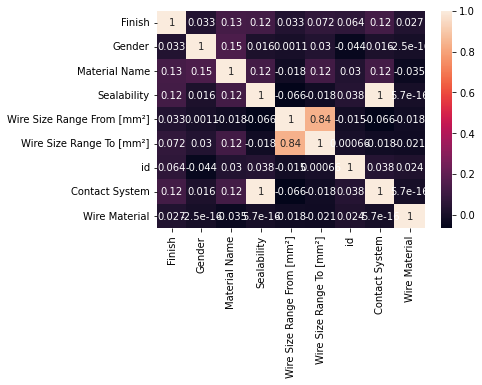

In [ ]:
corr=data_horizontal1.corr()
plt.figure()
sns.heatmap(corr,annot=True)
plt.show()

# **Strip Length [mm]**

In [ ]:
df3=data_horizontal1.loc[:,[ 'Finish', 'Gender','Material Name','Strip Length [mm]', 'Sealability','Wire Min. External Diameter [mm]','Wire Max. External Diameter [mm]','Wire Size Range From [mm²]', 'Wire Size Range To [mm²]','id']]

In [ ]:
df4=data_horizontal1.loc[:,['Leoni Part Number', 'Contact System', 'Tab Thickness [mm]', 'Tab Width [mm]', 'Wire Material','id']]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df3.head()
testdf = df3[df3['Strip Length [mm]'].isnull()==True]
traindf = df3[df3['Strip Length [mm]'].isnull()==False]
y = traindf['Strip Length [mm]']
traindf.drop('Strip Length [mm]',axis=1,inplace=True)
traindf.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Finish,Gender,Material Name,Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
1,3,0,14,0,1.183465,2.3,0.2,0.5,4
5,0,0,32,2,1.598245,2.554247,0.5,1.5,22
6,0,0,21,2,2.046341,3.179026,1.0,2.5,23
17,3,0,21,2,1.84022,2.465729,1.0,1.5,65
24,3,0,14,2,1.194998,1.768718,0.2,0.5,77


In [ ]:
lr.fit(traindf,y)
testdf.drop("Strip Length [mm]",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Strip Length [mm]']= pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf['Strip Length [mm]']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf.head()

,Finish,Gender,Material Name,Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Strip Length [mm]
1,3,0,14,0,1.183465,2.3,0.2,0.5,4,3.5
5,0,0,32,2,1.598245,2.554247,0.5,1.5,22,4.5
6,0,0,21,2,2.046341,3.179026,1.0,2.5,23,4.5
17,3,0,21,2,1.84022,2.465729,1.0,1.5,65,3.0
24,3,0,14,2,1.194998,1.768718,0.2,0.5,77,3.5


In [ ]:
testdf.head()

,Finish,Gender,Material Name,Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Strip Length [mm]
0,3,2,14,0,1.142954,1.6,0.25,0.35,2,3.817235
2,11,0,21,0,1.152643,1.656134,0.14,0.22,7,3.921776
3,11,0,4,0,1.169176,1.651835,0.20,0.35,11,4.009365
4,11,0,4,0,2.305979,3.105324,1.50,2.50,13,4.846647
7,3,0,14,2,1.172706,1.695666,0.20,0.40,27,3.807334


In [ ]:
df_result2 = pd.concat([testdf, traindf])

In [ ]:
df_result2= df_result2.sort_values(by=['id'])

In [ ]:
data_horizontal2 = pd.merge(df_result2,df4,on ='id',how = "outer")

In [ ]:
data_horizontal2.head()

,Finish,Gender,Material Name,Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Strip Length [mm],Leoni Part Number,Contact System,Tab Thickness [mm],Tab Width [mm],Wire Material
0,3,2,14,0,1.142954,1.6,0.25,0.35,2,3.817235,P00117177,0,0.64,0.64,1.0
1,3,0,14,0,1.183465,2.3,0.20,0.50,4,3.5,P00072506,0,0.8,2.8,1.0
2,11,0,21,0,1.152643,1.656134,0.14,0.22,7,3.921776,P00087589,0,NaN,1.2,1.0
3,11,0,4,0,1.169176,1.651835,0.20,0.35,11,4.009365,P00087605,0,0.8,2.8,1.0
4,11,0,4,0,2.305979,3.105324,1.50,2.50,13,4.846647,P00088453,0,0.8,4.8,1.0


In [ ]:
leoni_data= leoni_data.sort_values(by=['id'])



In [ ]:
l= data_horizontal2["id"].tolist()
l



[2,
 4,
 7,
 11,
 13,
 22,
 23,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 37,
 39,
 55,
 65,
 66,
 67,
 69,
 71,
 72,
 73,
 77,
 134,
 215,
 217,
 218,
 219,
 220,
 229,
 252,
 262,
 274,
 279,
 281,
 282,
 283,
 284,
 286,
 289,
 290,
 299,
 300,
 325,
 326,
 327,
 328,
 329,
 335,
 337,
 338,
 339,
 341,
 344,
 349,
 351,
 352,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 367,
 372,
 375,
 376,
 380,
 382,
 388,
 390,
 398,
 404,
 405,
 406,
 407,
 408,
 412,
 414,
 420,
 421,
 422,
 423,
 424,
 436,
 437,
 439,
 440,
 442,
 443,
 444,
 445,
 446,
 448,
 452,
 453,
 454,
 455,
 458,
 459,
 460,
 461,
 468,
 469,
 470,
 471,
 474,
 477,
 478,
 490,
 493,
 494,
 495,
 496,
 497,
 498,
 502,
 503,
 504,
 513,
 514,
 516,
 525,
 530,
 531,
 532,
 536,
 537,
 539,
 540,
 541,
 542,
 545,
 548,
 553,
 554,
 556,
 559,
 560,
 561,
 563,
 565,
 566,
 567,
 571,
 582,
 589,
 592,
 610,
 611,
 612,
 619,
 646,
 656,
 657,
 658,
 674,
 678,
 680,
 682,
 688,
 689,
 690,
 691,
 6

In [ ]:
for i in l :
    leoni_data["Strip Length [mm]"][leoni_data[leoni_data["id"]==i].index]=data_horizontal2["Strip Length [mm]"][data_horizontal2[data_horizontal2["id"]==i].index]
leoni_data.head()





/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,3.817235,sealable,0.64,0.64,Cu,1.6,1.142954,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,1.183465,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,3.921776,sealable,NaN,1.2,Cu,1.656134,1.152643,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,4.009365,sealable,0.8,2.8,Cu,1.651835,1.169176,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,4.846647,sealable,0.8,4.8,Cu,3.105324,2.305979,1.50,2.50,13


In [ ]:
for feature in data_horizontal2.columns:
    print(feature, np.round(data_horizontal2[feature].isnull().mean()*100, 4)+np.round((data_horizontal2[feature]==' ').mean()*100, 4),  ' % missing values')

Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Sealability 0.0  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Wire Max. External Diameter [mm] 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values
Strip Length [mm] 0.0  % missing values
Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')

Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 0.0  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 45.6434  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 0.0  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values


# **Tab Thickness [mm]**

In [ ]:
df5=data_horizontal2.loc[:,[ 'Finish', 'Gender','Material Name','Strip Length [mm]', 'Sealability','Wire Min. External Diameter [mm]','Wire Max. External Diameter [mm]','Wire Size Range From [mm²]', 'Wire Size Range To [mm²]','id' ,'Tab Thickness [mm]']]

In [ ]:
df6=data_horizontal2.loc[:,['Leoni Part Number', 'Contact System', 'Tab Width [mm]', 'Wire Material','id']]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df3.head()
testdf = df5[df5['Tab Thickness [mm]'].isnull()==True]
traindf = df5[df5['Tab Thickness [mm]'].isnull()==False]
y = traindf['Tab Thickness [mm]']
traindf.drop('Tab Thickness [mm]',axis=1,inplace=True)
traindf.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Finish,Gender,Material Name,Strip Length [mm],Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
0,3,2,14,3.817235,0,1.142954,1.6,0.25,0.35,2
1,3,0,14,3.5,0,1.183465,2.3,0.20,0.50,4
3,11,0,4,4.009365,0,1.169176,1.651835,0.20,0.35,11
4,11,0,4,4.846647,0,2.305979,3.105324,1.50,2.50,13
5,0,0,32,4.5,2,1.598245,2.554247,0.50,1.50,22


In [ ]:
lr.fit(traindf,y)
testdf.drop("Tab Thickness [mm]",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Tab Thickness [mm]']= pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf['Tab Thickness [mm]']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf.head()

,Finish,Gender,Material Name,Strip Length [mm],Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Tab Thickness [mm]
0,3,2,14,3.817235,0,1.142954,1.6,0.25,0.35,2,0.64
1,3,0,14,3.5,0,1.183465,2.3,0.20,0.50,4,0.8
3,11,0,4,4.009365,0,1.169176,1.651835,0.20,0.35,11,0.8
4,11,0,4,4.846647,0,2.305979,3.105324,1.50,2.50,13,0.8
5,0,0,32,4.5,2,1.598245,2.554247,0.50,1.50,22,0.8


In [ ]:
testdf.head()

,Finish,Gender,Material Name,Strip Length [mm],Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Tab Thickness [mm]
2,11,0,21,3.921776,0,1.152643,1.656134,0.14,0.22,7,0.665182
7,3,0,14,3.807334,2,1.172706,1.695666,0.20,0.40,27,0.686039
8,3,0,14,4.037126,2,1.458176,2.106976,0.50,1.00,28,0.715458
9,3,0,14,4.596812,2,2.050394,3.156983,1.01,2.50,29,0.809092
11,11,2,21,4.437479,2,2.105134,2.442015,1.50,1.50,32,0.676463


In [ ]:
df_result3 = pd.concat([testdf, traindf])

In [ ]:
df_result3= df_result3.sort_values(by=['id'])

In [ ]:
df_result3.head()

,Finish,Gender,Material Name,Strip Length [mm],Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Tab Thickness [mm]
0,3,2,14,3.817235,0,1.142954,1.6,0.25,0.35,2,0.64
1,3,0,14,3.5,0,1.183465,2.3,0.20,0.50,4,0.8
2,11,0,21,3.921776,0,1.152643,1.656134,0.14,0.22,7,0.665182
3,11,0,4,4.009365,0,1.169176,1.651835,0.20,0.35,11,0.8
4,11,0,4,4.846647,0,2.305979,3.105324,1.50,2.50,13,0.8


In [ ]:
data_horizontal3 = pd.merge(df_result3,df6,on ='id',how = "outer")

In [ ]:
data_horizontal3.head()

,Finish,Gender,Material Name,Strip Length [mm],Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Tab Thickness [mm],Leoni Part Number,Contact System,Tab Width [mm],Wire Material
0,3,2,14,3.817235,0,1.142954,1.6,0.25,0.35,2,0.64,P00117177,0,0.64,1.0
1,3,0,14,3.5,0,1.183465,2.3,0.20,0.50,4,0.8,P00072506,0,2.8,1.0
2,11,0,21,3.921776,0,1.152643,1.656134,0.14,0.22,7,0.665182,P00087589,0,1.2,1.0
3,11,0,4,4.009365,0,1.169176,1.651835,0.20,0.35,11,0.8,P00087605,0,2.8,1.0
4,11,0,4,4.846647,0,2.305979,3.105324,1.50,2.50,13,0.8,P00088453,0,4.8,1.0


In [ ]:
l= data_horizontal3["id"].tolist()
l


[2,
 4,
 7,
 11,
 13,
 22,
 23,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 37,
 39,
 55,
 65,
 66,
 67,
 69,
 71,
 72,
 73,
 77,
 134,
 215,
 217,
 218,
 219,
 220,
 229,
 252,
 262,
 274,
 279,
 281,
 282,
 283,
 284,
 286,
 289,
 290,
 299,
 300,
 325,
 326,
 327,
 328,
 329,
 335,
 337,
 338,
 339,
 341,
 344,
 349,
 351,
 352,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 367,
 372,
 375,
 376,
 380,
 382,
 388,
 390,
 398,
 404,
 405,
 406,
 407,
 408,
 412,
 414,
 420,
 421,
 422,
 423,
 424,
 436,
 437,
 439,
 440,
 442,
 443,
 444,
 445,
 446,
 448,
 452,
 453,
 454,
 455,
 458,
 459,
 460,
 461,
 468,
 469,
 470,
 471,
 474,
 477,
 478,
 490,
 493,
 494,
 495,
 496,
 497,
 498,
 502,
 503,
 504,
 513,
 514,
 516,
 525,
 530,
 531,
 532,
 536,
 537,
 539,
 540,
 541,
 542,
 545,
 548,
 553,
 554,
 556,
 559,
 560,
 561,
 563,
 565,
 566,
 567,
 571,
 582,
 589,
 592,
 610,
 611,
 612,
 619,
 646,
 656,
 657,
 658,
 674,
 678,
 680,
 682,
 688,
 689,
 690,
 691,
 6

In [ ]:
for i in l :
    leoni_data["Tab Thickness [mm]"][leoni_data[leoni_data["id"]==i].index]=data_horizontal3["Tab Thickness [mm]"][data_horizontal3[data_horizontal3["id"]==i].index]
leoni_data.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,3.817235,sealable,0.64,0.64,Cu,1.6,1.142954,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,1.183465,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,3.921776,sealable,0.665182,1.2,Cu,1.656134,1.152643,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,4.009365,sealable,0.8,2.8,Cu,1.651835,1.169176,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,4.846647,sealable,0.8,4.8,Cu,3.105324,2.305979,1.50,2.50,13


In [ ]:
for feature in data_horizontal3.columns:
    print(feature, np.round(data_horizontal3[feature].isnull().mean()*100, 4)+np.round((data_horizontal3[feature]==' ').mean()*100, 4),  ' % missing values')

Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 0.0  % missing values
Sealability 0.0  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Wire Max. External Diameter [mm] 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values
Tab Thickness [mm] 0.0  % missing values
Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')


Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 0.0  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 0.0  % missing values
Tab Width [mm] 35.9249  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 0.0  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values


# **Tab Width [mm]**

In [ ]:
df7=data_horizontal3.loc[:,[ 'Finish', 'Gender','Material Name','Strip Length [mm]', 'Sealability','Wire Min. External Diameter [mm]','Wire Max. External Diameter [mm]','Wire Size Range From [mm²]', 'Wire Size Range To [mm²]','id' ,'Tab Thickness [mm]','Tab Width [mm]']]

In [ ]:
df8=data_horizontal3.loc[:,['Leoni Part Number', 'Contact System',  'Wire Material','id']]

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df7.head()
testdf = df7[df7['Tab Width [mm]'].isnull()==True]
traindf = df7[df7['Tab Width [mm]'].isnull()==False]
y = traindf['Tab Width [mm]']
traindf.drop('Tab Width [mm]',axis=1,inplace=True)
traindf.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Finish,Gender,Material Name,Strip Length [mm],Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Tab Thickness [mm]
0,3,2,14,3.817235,0,1.142954,1.6,0.25,0.35,2,0.64
1,3,0,14,3.5,0,1.183465,2.3,0.20,0.50,4,0.8
2,11,0,21,3.921776,0,1.152643,1.656134,0.14,0.22,7,0.665182
3,11,0,4,4.009365,0,1.169176,1.651835,0.20,0.35,11,0.8
4,11,0,4,4.846647,0,2.305979,3.105324,1.50,2.50,13,0.8


In [ ]:
lr.fit(traindf,y)
testdf.drop("Tab Width [mm]",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Tab Width [mm]']= pred

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
traindf['Tab Width [mm]']=y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_result4 = pd.concat([testdf, traindf])

In [ ]:
df_result4= df_result4.sort_values(by=['id'])

In [ ]:
df_result4.head()

,Finish,Gender,Material Name,Strip Length [mm],Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Tab Thickness [mm],Tab Width [mm]
0,3,2,14,3.817235,0,1.142954,1.6,0.25,0.35,2,0.64,0.64
1,3,0,14,3.5,0,1.183465,2.3,0.20,0.50,4,0.8,2.8
2,11,0,21,3.921776,0,1.152643,1.656134,0.14,0.22,7,0.665182,1.2
3,11,0,4,4.009365,0,1.169176,1.651835,0.20,0.35,11,0.8,2.8
4,11,0,4,4.846647,0,2.305979,3.105324,1.50,2.50,13,0.8,4.8


In [ ]:
data_horizontal4 = pd.merge(df_result4,df8,on ='id',how = "outer")

In [ ]:
data_horizontal4.head()

,Finish,Gender,Material Name,Strip Length [mm],Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Tab Thickness [mm],Tab Width [mm],Leoni Part Number,Contact System,Wire Material
0,3,2,14,3.817235,0,1.142954,1.6,0.25,0.35,2,0.64,0.64,P00117177,0,1.0
1,3,0,14,3.5,0,1.183465,2.3,0.20,0.50,4,0.8,2.8,P00072506,0,1.0
2,11,0,21,3.921776,0,1.152643,1.656134,0.14,0.22,7,0.665182,1.2,P00087589,0,1.0
3,11,0,4,4.009365,0,1.169176,1.651835,0.20,0.35,11,0.8,2.8,P00087605,0,1.0
4,11,0,4,4.846647,0,2.305979,3.105324,1.50,2.50,13,0.8,4.8,P00088453,0,1.0


In [ ]:
l= data_horizontal4["id"].tolist()
l



[2,
 4,
 7,
 11,
 13,
 22,
 23,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 37,
 39,
 55,
 65,
 66,
 67,
 69,
 71,
 72,
 73,
 77,
 134,
 215,
 217,
 218,
 219,
 220,
 229,
 252,
 262,
 274,
 279,
 281,
 282,
 283,
 284,
 286,
 289,
 290,
 299,
 300,
 325,
 326,
 327,
 328,
 329,
 335,
 337,
 338,
 339,
 341,
 344,
 349,
 351,
 352,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 365,
 366,
 367,
 372,
 375,
 376,
 380,
 382,
 388,
 390,
 398,
 404,
 405,
 406,
 407,
 408,
 412,
 414,
 420,
 421,
 422,
 423,
 424,
 436,
 437,
 439,
 440,
 442,
 443,
 444,
 445,
 446,
 448,
 452,
 453,
 454,
 455,
 458,
 459,
 460,
 461,
 468,
 469,
 470,
 471,
 474,
 477,
 478,
 490,
 493,
 494,
 495,
 496,
 497,
 498,
 502,
 503,
 504,
 513,
 514,
 516,
 525,
 530,
 531,
 532,
 536,
 537,
 539,
 540,
 541,
 542,
 545,
 548,
 553,
 554,
 556,
 559,
 560,
 561,
 563,
 565,
 566,
 567,
 571,
 582,
 589,
 592,
 610,
 611,
 612,
 619,
 646,
 656,
 657,
 658,
 674,
 678,
 680,
 682,
 688,
 689,
 690,
 691,
 6

In [ ]:

for i in l :
    leoni_data["Tab Width [mm]"][leoni_data[leoni_data["id"]==i].index]=data_horizontal4["Tab Width [mm]"][data_horizontal4[data_horizontal4["id"]==i].index]
leoni_data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,3.817235,sealable,0.64,0.64,Cu,1.6,1.142954,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,1.183465,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,3.921776,sealable,0.665182,1.2,Cu,1.656134,1.152643,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,4.009365,sealable,0.8,2.8,Cu,1.651835,1.169176,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,4.846647,sealable,0.8,4.8,Cu,3.105324,2.305979,1.50,2.50,13


In [ ]:
data_horizontal4.head()

,Finish,Gender,Material Name,Strip Length [mm],Sealability,Wire Min. External Diameter [mm],Wire Max. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id,Tab Thickness [mm],Tab Width [mm],Leoni Part Number,Contact System,Wire Material
0,3,2,14,3.817235,0,1.142954,1.6,0.25,0.35,2,0.64,0.64,P00117177,0,1.0
1,3,0,14,3.5,0,1.183465,2.3,0.20,0.50,4,0.8,2.8,P00072506,0,1.0
2,11,0,21,3.921776,0,1.152643,1.656134,0.14,0.22,7,0.665182,1.2,P00087589,0,1.0
3,11,0,4,4.009365,0,1.169176,1.651835,0.20,0.35,11,0.8,2.8,P00087605,0,1.0
4,11,0,4,4.846647,0,2.305979,3.105324,1.50,2.50,13,0.8,4.8,P00088453,0,1.0


In [ ]:
for feature in data_horizontal4.columns:
    print(feature, np.round(data_horizontal4[feature].isnull().mean()*100, 4)+np.round((data_horizontal4[feature]==' ').mean()*100, 4),  ' % missing values')

Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 0.0  % missing values
Sealability 0.0  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Wire Max. External Diameter [mm] 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values
Tab Thickness [mm] 0.0  % missing values
Tab Width [mm] 0.0  % missing values
Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Wire Material 0.0  % missing values


In [ ]:
for feature in leoni_data.columns:
    print(feature, np.round(leoni_data[feature].isnull().mean()*100, 4)+np.round((leoni_data[feature]==' ').mean()*100, 4),  ' % missing values')


Leoni Part Number 0.0  % missing values
Contact System 0.0  % missing values
Finish 0.0  % missing values
Gender 0.0  % missing values
Material Name 0.0  % missing values
Strip Length [mm] 0.0  % missing values
Sealability 0.0  % missing values
Tab Thickness [mm] 0.0  % missing values
Tab Width [mm] 0.0  % missing values
Wire Material 0.0  % missing values
Wire Max. External Diameter [mm] 0.0  % missing values
Wire Min. External Diameter [mm] 0.0  % missing values
Wire Size Range From [mm²] 0.0  % missing values
Wire Size Range To [mm²] 0.0  % missing values
id 0.0  % missing values


In [ ]:
leoni_data.head()

,Leoni Part Number,Contact System,Finish,Gender,Material Name,Strip Length [mm],Sealability,Tab Thickness [mm],Tab Width [mm],Wire Material,Wire Max. External Diameter [mm],Wire Min. External Diameter [mm],Wire Size Range From [mm²],Wire Size Range To [mm²],id
2,P00117177,MQS 0.64,Au,male,CuNiSi,3.817235,sealable,0.64,0.64,Cu,1.6,1.142954,0.25,0.35,2
4,P00072506,JPT 2.8,Au,female,CuNiSi,3.5,sealable,0.8,2.8,Cu,2.3,1.183465,0.20,0.50,4
7,P00087589,MCON 1.2,Sn,female,CuSn,3.921776,sealable,0.665182,1.2,Cu,1.656134,1.152643,0.14,0.22,7
11,P00087605,MAK 2.8,Sn,female,CuCrSiTi,4.009365,sealable,0.8,2.8,Cu,1.651835,1.169176,0.20,0.35,11
13,P00088453,DFK 40 4.8,Sn,female,CuCrSiTi,4.846647,sealable,0.8,4.8,Cu,3.105324,2.305979,1.50,2.50,13


In [ ]:
leoni_data.shape

(4476, 15)

In [ ]:
data_horizontal4.shape

(4476, 15)

# **Extract Data**

In [ ]:
Perfect_data = leoni_data

In [ ]:
Perfect_data.to_excel("/content/drive/MyDrive/dataset/clean_dataset.xls", index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.



In [ ]:
Perfect_data.to_csv("/content/drive/MyDrive/dataset/clean_dataset.csv", index=False)